# Generic EDA for exploring new Datasets

Pandas-based code for small datasets or samples. Performs a generic EDA for structured and semi-structured datasets and provides data exploration visualization. Generates a PDF report with the relevant information, including:

- Dataset name, source and version
- Dataset size and dimensions
- Duplicates detection
- Time Series analysis
    - Time Series data detection
    - Time Series range
    - Time Series visualization
    - Time Series frequency
    - Time Step regularity
    - Multiple Time Series detection
- Descriptive stats for numeric features
    - Min, Max, Std Dev, Avg, Count, Quartiles
    - Histogram
    - Box plot
    - Outliers
    - Inliers
- Data Quality Assessment
    - Number and ratio of missing values
    - Number and ratio of unique values
- Correlational Analysis
    - Pearson Correlation
    - Spearman Correlation

---

raul.arrabales@gmail.com - Jun '23

---
More info and updates at:<br> [Raul repo for DataScience Enablement - Generic EDA](https://github.com/raul-arrabales/DataScience_Enablement/blob/main/Generic_EDA.ipynb)

### Report settings

In [1]:
# Threshold of percentage of missing values in a column to raise a warning
PCT_MISSING_THRESHOLD = 20 # Warn me if there's more than 20% missing values in a column. 

# Threshold of percentage of duplicated rows to raise a warning
PCT_DUPLICATED_ROWS = 10 # Warn me if there's more than 10% duplicated rows. 

# Number of numbers to show as a sample in the report, eg. a sample of outliers
DISPLAY_NUM_SAMPLE_SIZE = 10 # Show a sample of 10 outliers maximum. 


### Libs

In [2]:
# Path manipulation
import os 

# dataset manipulation
import pandas as pd 
import numpy as np

# PDF report generation
from fpdf import FPDF

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Managing dates
from datetime import datetime
from pandas.api.types import is_datetime64_any_dtype as is_datetime

### Dataset Identification

In [3]:
# Dataset details, for loading and report
dataset_path = "../data/plants_meteo_ts.csv"
dataset_name = os.path.basename(dataset_path)
dataset_source = dataset_path
dataset_version = "6Jun23"

# Dataset configuration for loading
dataset_format = "csv"
dataset_hasHeader = 0
dataset_separator = ','

### Misc Config

In [4]:
# Random seed
r_seed = 41

### PDF Report formatting

In [5]:
# Document author
pdf_author = "raul.arrabales"
pdf_link = "https://github.com/raul-arrabales/DataScience_Enablement"

# Margin
pdf_margin = 10 

# Page width: Width of A4 is 210mm
pdf_width = 210 - 2*pdf_margin

# Cell height
pdf_cell_heigth = 50

In [6]:
# My PDF template
class PDF(FPDF):
    def __init__(self):
        super().__init__()
    def header(self):
        self.set_font('Arial', '', 12)
        self.cell(0, 8, dataset_name + ' EDA', 0, 1, 'C')
    def footer(self):
        self.set_y(-15)
        self.set_font('Arial', '', 12)
        self.cell(0, 8, f'Page {self.page_no()}', 0, 0, 'C')
          
# Create empty doc
pdf = PDF()
pdf.add_page()

In [7]:
def duoprint(text, pdf, marker=False, warning=False, box=False):
    """ Prints the input both in the PDF and output
    - marker: indicates a yellow background and bold font
    - warning: indicates the message is a warning
    - box: indicated a border around text cell
    """
    text_height = 10 # default line height 
    print_border = 0 # no border, by default
    
    if (marker): # Bold and yellow fill
        pdf.set_font('Arial', 'B', 12)
        pdf.set_fill_color(r=248, g=230, b=145)
    else:
        pdf.set_font('Arial', '', 12)
        
    if (warning): 
        pdf.set_text_color(r=255, g=95, b=21) # orange
        
    if (box): 
        print_border = 1
        text_height = 14
        pdf.set_font('Arial', 'B', 14)
        pdf.set_text_color(r=0, g=0, b=0)
        
    pdf.cell(w=0, h=text_height, txt=text, border=print_border, ln=1, fill=marker)
    pdf.set_text_color(r=0, g=0, b=0)
    print(text)

In [8]:
def blank_line(pdf, height=8):
    """ Prints an empty line in the PDF. 
    - height: indicated height of blank line
    """
    pdf.ln(height)

In [9]:
def print_table(df, title, pdf):
    """ Prints a df as a table in the PDF
    """
    text_height = 6 # default line height
    text_width = 40
    ln_flag = 0 # Change line flag
    
    # Table Header
    pdf.set_font('Arial', 'B', 12)
    for c in df.columns:
        if c == df.columns[len(df.columns)-1]:
            ln_flag = 1
        pdf.cell(w=text_width, h=text_height, txt=c, border=1, ln=ln_flag, align='C')
        
    pdf.ln(1)
    ln_flag = 0
    
    # Table contents
    pdf.set_font('Arial', '', 12)
    for i in range(0, len(df)):
        ln_flag = 0
        for c in df.columns:
            if c == df.columns[len(df.columns)-1]:
                ln_flag = 1
            # format text
            text = str(df[c].iloc[i])
            try:
                num = float(text)
                text = f'{num:.2f}'
            except ValueError:
                text = text.strip() 
            pdf.cell(w=text_width, h=text_height, txt=text, border=1, ln=ln_flag, align='C')
    
    pdf.ln(1)

### Dataset metadata and dataset loading

In [10]:
if (dataset_format == 'csv'):
    df = pd.read_csv(
        dataset_path,
        header=dataset_hasHeader,
        delimiter=dataset_separator)
else:
    print("Dataset format not supported.")

In [11]:
# Quick peek
sample_df = df.sample(4)
sample_df

,cantidad_plantada,num_plantas_recogidas,anio_semana,temp_aire_promedio,temp_aire_max,temp_aire_min,humedad_relativa_promedio,humedad_relativa_max,humedad_relativa_min,anio,...,humedad_relativa_promedioWin5avg,humedad_relativa_maxWin5avg,humedad_relativa_minWin5avg,temp_aire_promedioWin6avg,temp_aire_maxWin6avg,temp_aire_minWin6avg,humedad_relativa_promedioWin6avg,humedad_relativa_maxWin6avg,humedad_relativa_minWin6avg,fecha
25,0.0,0.0,2019-W47,4.792857,8.920000,0.862857,87.571429,98.022857,67.078571,2019,...,87.027714,97.276571,66.411429,7.767857,12.626429,3.662381,86.981905,97.597857,64.154762,2019-11-17
122,0.0,61132.0,2021-W39,14.717143,22.687143,8.284286,75.478571,97.410000,43.210000,2021,...,74.160286,98.246286,36.285143,15.364048,24.730714,7.449762,73.835714,98.170000,35.076429,2021-09-26
120,0.0,228355.0,2021-W37,19.020000,27.642857,10.580000,63.191429,96.145714,28.292857,2021,...,69.106857,96.958571,31.646000,18.022619,27.960476,9.183571,66.803095,96.772143,28.963333,2021-09-12
162,574185.0,631804.0,2022-W27,19.677143,31.160000,8.174286,51.675714,93.141429,16.900000,2022,...,47.992571,90.518857,15.847143,22.356190,33.285476,11.212857,48.529048,90.705952,16.430714,2022-07-03


#### Report header

In [12]:
duoprint("EDA for dataset: " + dataset_name, pdf, box=True)
duoprint("Dataset version: " + dataset_version + ". Last file modification: " + 
         str(datetime.fromtimestamp(os.path.getmtime(dataset_path))), pdf)
duoprint("Report Generated: " + datetime.now().strftime("%d/%m/%Y %H:%M:%S"), pdf)
duoprint("By: " + pdf_author + " - See: " + pdf_link, pdf)
duoprint("From: " + dataset_source, pdf)

EDA for dataset: plants_meteo_ts.csv
Dataset version: 6Jun23. Last file modification: 2023-06-10 15:34:57.372869
Report Generated: 10/06/2023 15:37:03
By: raul.arrabales - See: https://github.com/raul-arrabales/DataScience_Enablement
From: ../data/plants_meteo_ts.csv


### Ad Hoc dataset fixing
Based on problems discovered during EDA

In [13]:
# Prolexitim Dataset 
# Data Quality Problem 1 - Column age with a date value
# Age column was loaded as object and it shoud be int
# The affected row is dropped and type converted to int. 
if (dataset_path == "data/Prolexitim_Jan23_En.csv"):
    print("Fixing Age column for Prolexitim dataset")
    df = df.drop(df[df['Age'] == "2021-05-23T00:00:00.000Z"].index)
    df['Age'] = df['Age'].astype(str).astype(int)

### Basic Dataset exploration

#### Dataset size

In [14]:
blank_line(pdf)
duoprint("Dataset Dimensions", pdf, box=True)

file_size = os.path.getsize(dataset_path) / 1024 ** 2 # In Megabytes
file_size_info = f'File size: {file_size:.2f} MB.'
duoprint(file_size_info, pdf)

n_rows = len(df)
row_info = "Number of rows: " + str(n_rows)
duoprint(row_info, pdf)

n_cols = df.shape[1]
col_info = "Number of columns: " + str(n_cols)
duoprint(col_info,pdf)

Dataset Dimensions
File size: 0.11 MB.
Number of rows: 176
Number of columns: 44


#### Duplicates Detection

In [15]:
blank_line(pdf)
duoprint("Duplicates Detection", pdf, box=True)

# Duplicate rows
num_dups = len(df)-len(df.drop_duplicates())

if (num_dups > 0):
    pct_dups = (num_dups/n_rows)*100
    duoprint(f'There are {num_dups} duplicate rows in the dataset ({pct_dups:.2f}%).', pdf)
    print("Sample duplicate rows:")
    dups_df = df[df.duplicated()]
    if (len(dups_df) > 4):
        dups_df.sample(4)
    else:
        display(dups_df)
    if (pct_dups > PCT_DUPLICATED_ROWS):
        duoprint("Warning: too many duplicated rows", pdf, warning=True)
else:
    duoprint("There are no duplicate rows in the dataset.", pdf)

Duplicates Detection
There are no duplicate rows in the dataset.


#### Check for Time Series data

In [16]:
blank_line(pdf)
duoprint("Time Series Data Detection", pdf, box=True)

# List of colums with datetime or timestamp information
timestamp_cols = []

# Do we have a detected datetime?
dt_flag = False

# Do we have a well-formatted datetime loaded as object?
dt_convert_flag = False

for c in df.columns:
    if (is_datetime(df[c])):
        duoprint("Column " + c + " contains a datetime.", pdf)
        timestamp_cols.append(c)
        dt_flag = True
    elif df[c].dtype == 'object':
        try:
            df['Converted_'+c] = pd.to_datetime(df[c])
            dt_convert_flag = True
            duoprint("Column " + c + " was loaded as an object but contains a well-formatted datetime.", pdf)
            duoprint("A new column of type " + str(df['Converted_'+c].dtype) + " named Converted_" + c + " has been created successfully.", pdf)
            timestamp_cols.append(c)
        except ValueError:
            pass
            # print("Can't convert " + c + " to datetime.")
            
    if (dt_flag or dt_convert_flag):
        if (sum(df.groupby(c)[c].count().tolist()) == n_rows): # No duplicate timestamps
            duoprint(f'Possible single time series. Column {c} has 1 observation per timestamp', pdf)
        else:
            duoprint(f'Possible multi time series: column {c} has multiple observations per timestamp.',pdf)
        dt_flag = False
        dt_convert_flag = False
        
if (len(timestamp_cols) > 0): 
    duoprint(f'List of possible time index columns: {timestamp_cols}',pdf)

Time Series Data Detection
Column fecha was loaded as an object but contains a well-formatted datetime.
A new column of type datetime64[ns] named Converted_fecha has been created successfully.
Possible single time series. Column fecha has 1 observation per timestamp
List of possible time index columns: ['fecha']


/tmp/ipykernel_15292/2441620840.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Converted_'+c] = pd.to_datetime(df[c])


### Helper functions for individual feature analysis

In [17]:
def get_IQR_outliers(df_col, mode='all'):
    """ Gets the list of inter-quartil range ourliers from a df column
    - df_col: numeric dataframe column
    - mode: (all|largest|smallest)
           all - Gets all outliers
           largest - Gets outliers over Q3
           smallest - Gets outliers below Q1
    """ 
    # times above Q3 and below Q1 for the IQR calculation
    times_IQR = 1.5
    
    # first quartil
    q1=df_col.quantile(0.25)
    # third quartil
    q3=df_col.quantile(0.75)

    # Inter-quartil range
    IQR=q3-q1
    
    # Outliers outside the range 
    if (mode == 'all'):
        outliers = df_col[( (df_col < (q1-times_IQR*IQR) ) | (df_col > (q3+times_IQR*IQR) ))]
    elif (mode == 'largest'): 
        outliers = df_col[(df_col > (q3+times_IQR*IQR))]
    elif (mode == 'smallest'):
        outliers = df_col[(df_col < (q1-times_IQR*IQR))]
    else:
        raise BaseException('Mode not supported: use all, largest, or smallest')

    return outliers

In [18]:
def get_possible_inliers(df_col, strict=True):
    """ Gets the list of inliers from a df column

    Inliers here are defined as the outliers of values frequencies
    To prevent too many false positives 

    - df_col: numeric dataframe column
    - strict: if strict another condicion is applied for considering inliners:
       frequency has to be higher than 50 * (number of non-missing rows in the feature) / (number of unique non-missing values in the feature)
    Inliers here are defined as the outliers of values frequencies
    To prevent too many false positives 
    """ 
    freqs = df_col.value_counts()
    freqs_outliers = get_IQR_outliers(freqs)
    
    if (len(freqs_outliers) > 0): 
        if (strict): 
            n_non_missing = df_col.count()
            n_unique_non_missing = df_col.nunique()
            inliers = freqs_outliers[(freqs_outliers > 50*(n_non_missing/n_unique_non_missing))] 
        else:
            inliers = freqs_outliers
    else:
        inliers = pd.DataFrame({'inliers' : []}) # Empty df for no inliers
    
    return inliers
    

#### Dataset Columns Descriptive Analysis

Columns Univariate Analysis
Column: cantidad_plantada
Column Type: float64
Sample value: 596817.0
Number of unique values: 67
Percentage of unique values: 38.07%
Number of missing values: 0
Percentage of missing values: 0.00%

                   count           mean            std  min  25%  50%   
cantidad_plantada  176.0  217748.272727  377397.949448  0.0  0.0  0.0  \

                        75%        max  
cantidad_plantada  417912.5  1622656.0  

Sample of outliers: [1139570.0, 1249141.0, 1193897.0, 1437280.0, 1224996.0, 1143907.0, 1084279.0, 1478882.0, 1291939.0, 1622656.0]
Sample of outliers over Q3: [1084279.0, 1139570.0, 1143907.0, 1193897.0, 1209629.0, 1224996.0, 1249141.0, 1291939.0, 1437280.0, 1478882.0]
Sample of outliers below Q1: []
No inliers detected in column cantidad_plantada
Column cantidad_plantada values frequency:


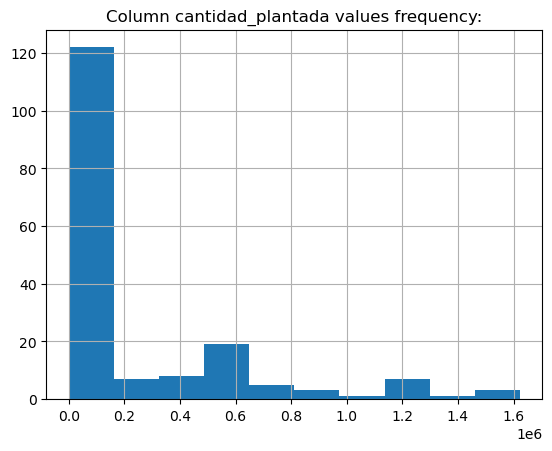

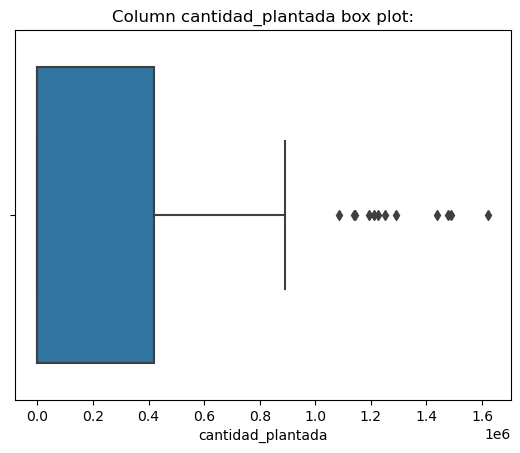

---
Column: num_plantas_recogidas
Column Type: float64
Sample value: 0.0
Number of unique values: 75
Percentage of unique values: 42.61%
Number of missing values: 0
Percentage of missing values: 0.00%

                       count           mean            std  min  25%  50%   
num_plantas_recogidas  176.0  161293.857955  272309.487806  0.0  0.0  0.0  \

                            75%        max  
num_plantas_recogidas  277941.5  1303697.0  

Sample of outliers: [1303697.0, 1235438.0, 764995.0, 911969.0, 843376.0, 1237973.0, 901051.0, 700118.0, 708620.0, 874979.0]
Sample of outliers over Q3: [700118.0, 708620.0, 719884.0, 764995.0, 843376.0, 874979.0, 901051.0, 911969.0, 1235438.0, 1237973.0]
Sample of outliers below Q1: []
No inliers detected in column num_plantas_recogidas
Column num_plantas_recogidas values frequency:


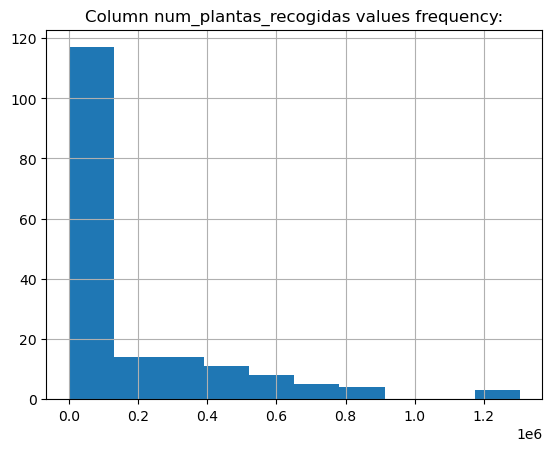

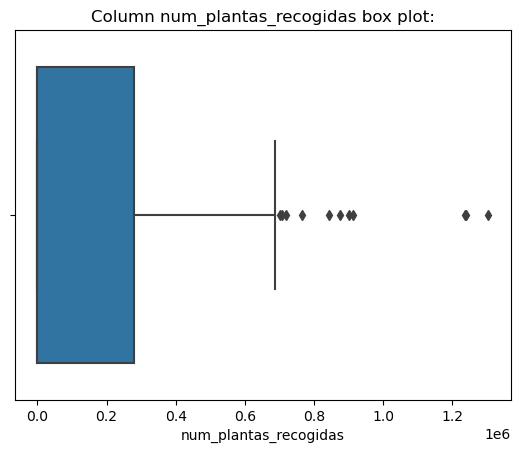

---
Column: anio_semana
Column Type: object
See Converted_anio_semana column below for a detailed analysis.
Sample value: 2021-W18
Number of unique values: 176
Percentage of unique values: 100.00%
Number of missing values: 0
Percentage of missing values: 0.00%
---
Column: temp_aire_promedio
Column Type: float64
Sample value: 9.695714285714288
Number of unique values: 176
Percentage of unique values: 100.00%
Number of missing values: 1
Percentage of missing values: 0.57%

                    count       mean       std       min       25%    50%   
temp_aire_promedio  175.0  12.626016  7.118535 -3.264286  6.692857  12.11  \

                          75%        max  
temp_aire_promedio  18.535714  28.531429  

There are no outliers in column temp_aire_promedio
No inliers detected in column temp_aire_promedio
Column temp_aire_promedio values frequency:


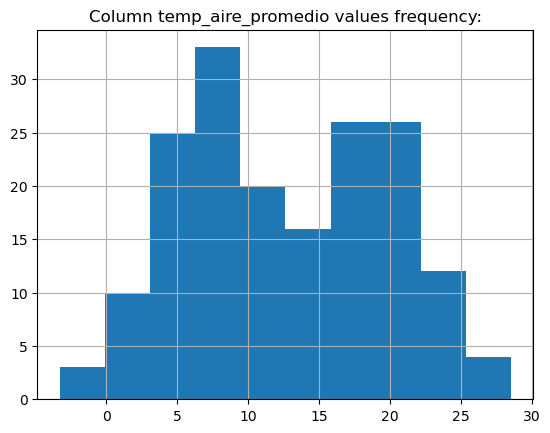

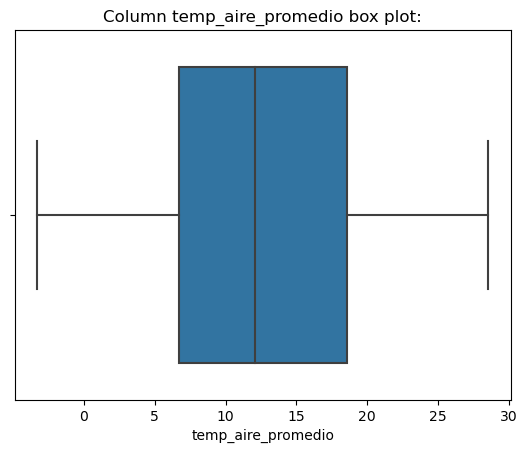

---
Column: temp_aire_max
Column Type: float64
Sample value: 16.254285714285714
Number of unique values: 176
Percentage of unique values: 100.00%
Number of missing values: 1
Percentage of missing values: 0.57%

               count      mean       std       min     25%        50%    75%   
temp_aire_max  175.0  21.55618  8.563914  3.442857  14.255  20.791429  29.38  \

                     max  
temp_aire_max  40.654286  

There are no outliers in column temp_aire_max
No inliers detected in column temp_aire_max
Column temp_aire_max values frequency:


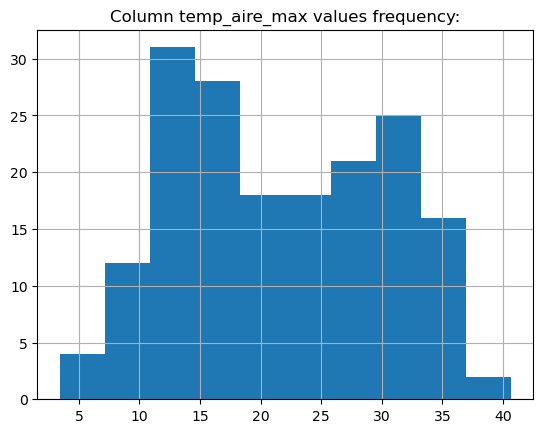

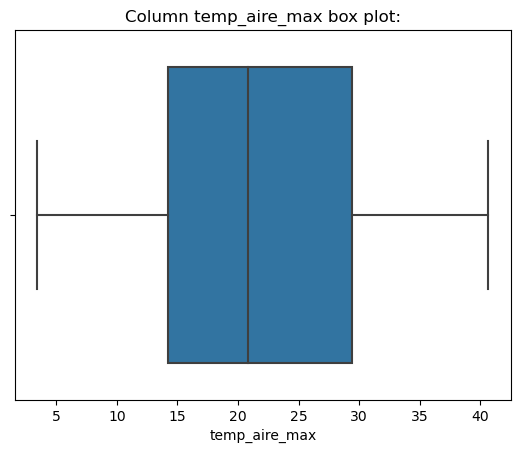

---
Column: temp_aire_min
Column Type: float64
Sample value: 5.4557142857142855
Number of unique values: 176
Percentage of unique values: 100.00%
Number of missing values: 1
Percentage of missing values: 0.57%

               count      mean       std        min       25%       50%   
temp_aire_min  175.0  4.640351  5.536211 -10.054286  0.657143  5.455714  \

                    75%        max  
temp_aire_min  8.988571  15.095714  

There are no outliers in column temp_aire_min
No inliers detected in column temp_aire_min
Column temp_aire_min values frequency:


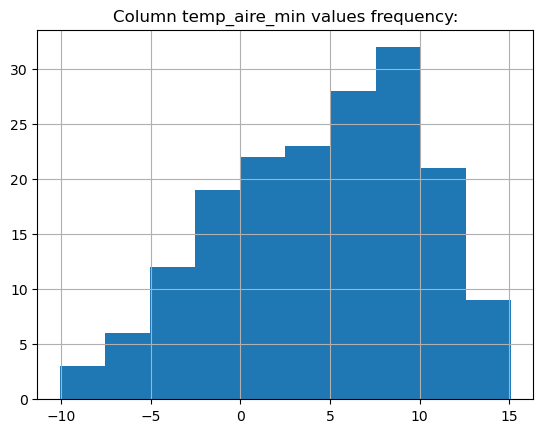

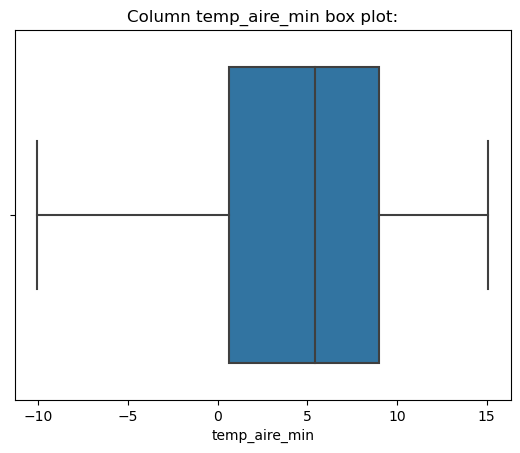

---
Column: humedad_relativa_promedio
Column Type: float64
Sample value: 85.65285714285714
Number of unique values: 175
Percentage of unique values: 99.43%
Number of missing values: 1
Percentage of missing values: 0.57%

                           count       mean        std        min        25%   
humedad_relativa_promedio  175.0  69.942865  14.467454  31.114286  56.848571  \

                                 50%        75%        max  
humedad_relativa_promedio  71.522857  82.862857  93.564286  

There are no outliers in column humedad_relativa_promedio
No inliers detected in column humedad_relativa_promedio
Column humedad_relativa_promedio values frequency:


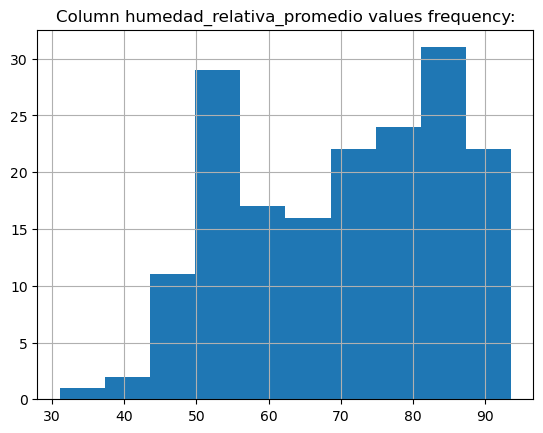

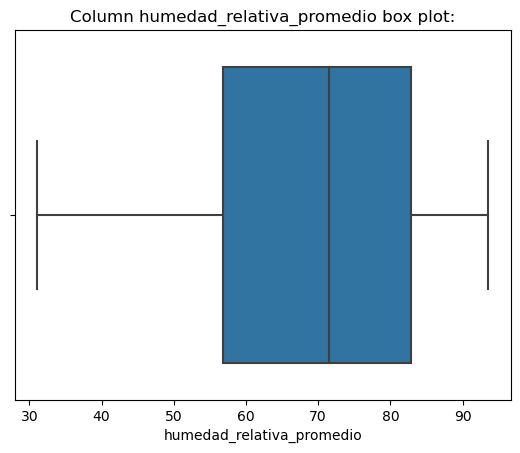

---
Column: humedad_relativa_max
Column Type: float64
Sample value: 99.24285714285716
Number of unique values: 168
Percentage of unique values: 95.45%
Number of missing values: 1
Percentage of missing values: 0.57%

                      count       mean       std        min    25%        50%   
humedad_relativa_max  175.0  95.795731  4.145182  73.774286  94.11  97.394286  \

                        75%        max  
humedad_relativa_max  98.93  99.337143  

Sample of outliers: [85.82571428571428, 86.36, 73.77428571428572, 86.47857142857143, 79.9342857142857, 83.2057142857143, 86.61571428571428, 85.05857142857143]
Sample of outliers over Q3: []
Sample of outliers below Q1: [86.61571428571428, 86.47857142857143, 86.36, 85.82571428571428, 85.05857142857143, 83.2057142857143, 79.9342857142857, 73.77428571428572]
No inliers detected in column humedad_relativa_max
Column humedad_relativa_max values frequency:


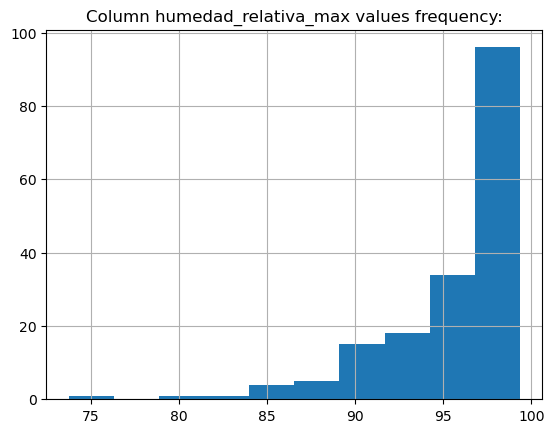

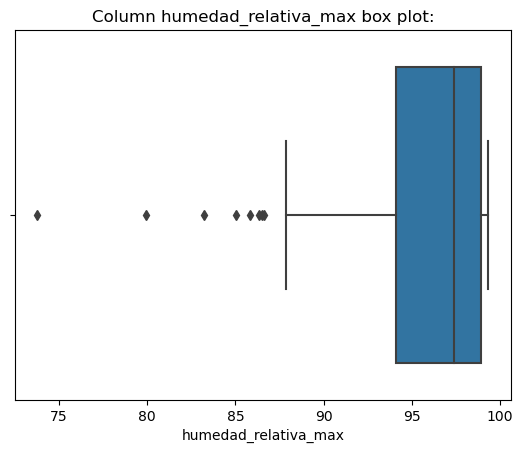

---
Column: humedad_relativa_min
Column Type: float64
Sample value: 51.95285714285715
Number of unique values: 176
Percentage of unique values: 100.00%
Number of missing values: 1
Percentage of missing values: 0.57%

                      count       mean        std       min        25%   
humedad_relativa_min  175.0  36.574024  17.046071  8.112857  21.009286  \

                            50%        75%        max  
humedad_relativa_min  33.557143  50.262143  76.147143  

There are no outliers in column humedad_relativa_min
No inliers detected in column humedad_relativa_min
Column humedad_relativa_min values frequency:


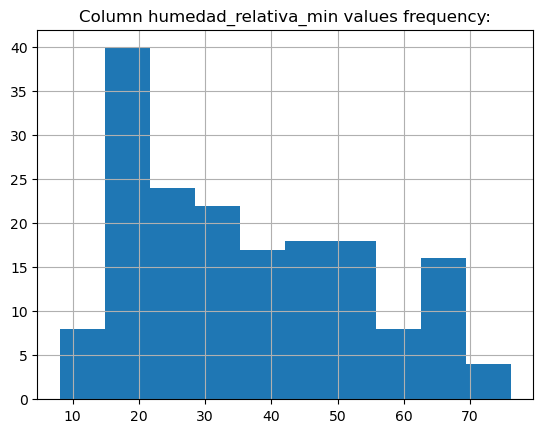

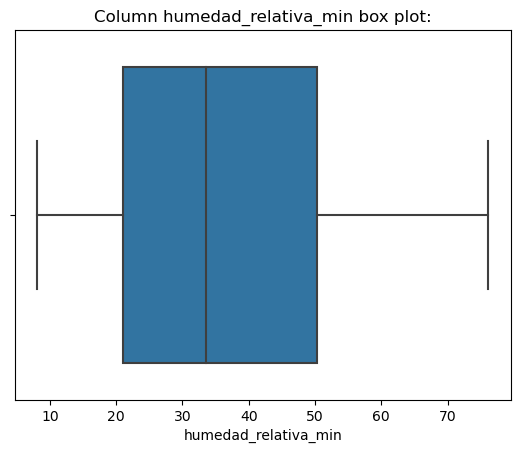

---
Column: anio
Column Type: int64
Sample value: 2021
Number of unique values: 4
Percentage of unique values: 2.27%
Number of missing values: 0
Percentage of missing values: 0.00%

      count         mean      std     min     25%     50%     75%     max
anio  176.0  2020.568182  1.03422  2019.0  2020.0  2021.0  2021.0  2022.0

There are no outliers in column anio
No inliers detected in column anio
Column anio values frequency:


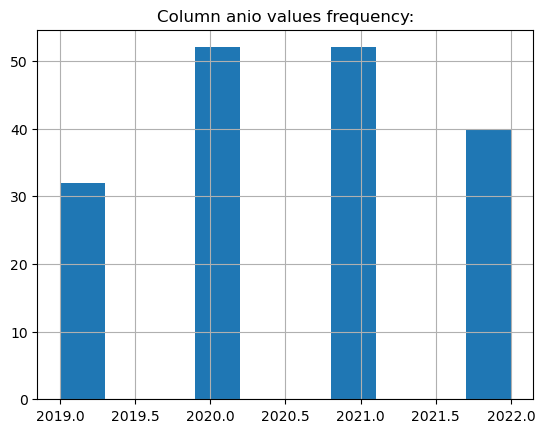

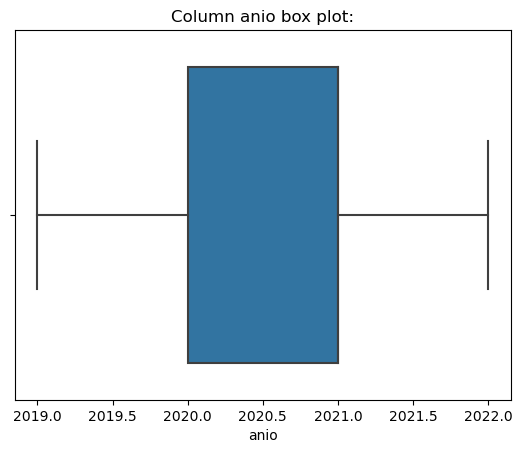

---
Column: mes
Column Type: int64
Sample value: 5
Number of unique values: 12
Percentage of unique values: 6.82%
Number of missing values: 0
Percentage of missing values: 0.00%

     count      mean       std  min  25%  50%  75%   max
mes  176.0  6.602273  3.310726  1.0  4.0  7.0  9.0  12.0

There are no outliers in column mes
No inliers detected in column mes
Column mes values frequency:


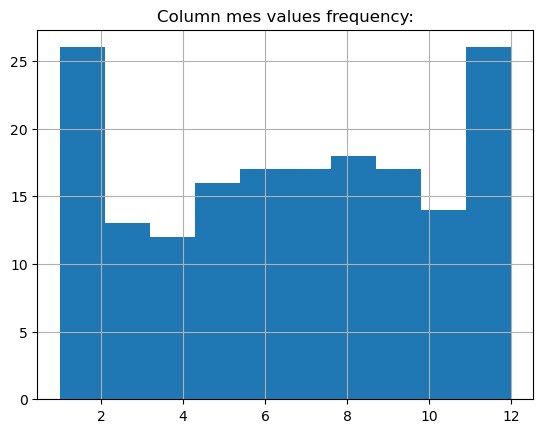

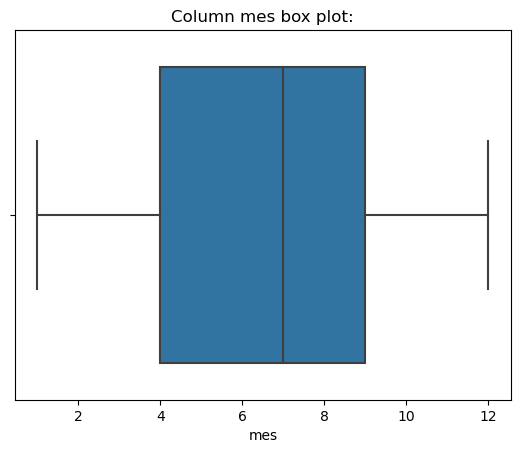

---
Column: dia_sem
Column Type: int64
Sample value: 6
Number of unique values: 1
Percentage of unique values: 0.57%
Number of missing values: 0
Percentage of missing values: 0.00%

         count  mean  std  min  25%  50%  75%  max
dia_sem  176.0   6.0  0.0  6.0  6.0  6.0  6.0  6.0

There are no outliers in column dia_sem
No inliers detected in column dia_sem
Column dia_sem values frequency:


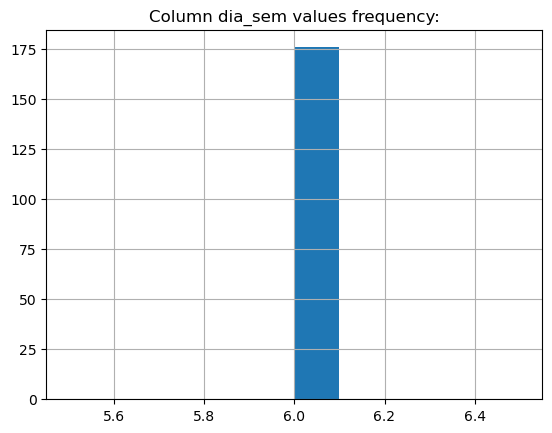

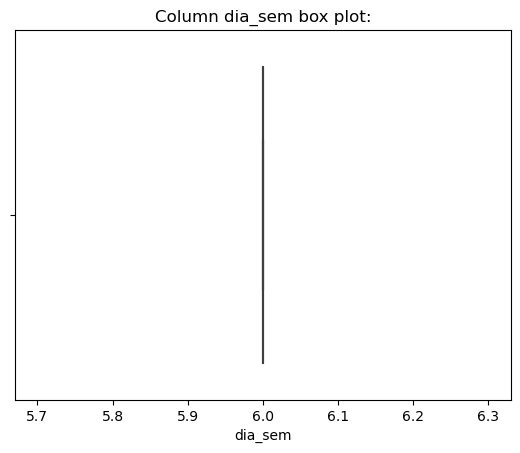

---
Column: num_plantas_listas
Column Type: float64
Sample value: 198793.0101560934
Number of unique values: 108
Percentage of unique values: 61.36%
Number of missing values: 5
Percentage of missing values: 2.84%

                    count           mean            std  min  25%       50%   
num_plantas_listas  171.0  165751.173806  217448.006728  0.0  0.0  27500.96  \

                              75%       max  
num_plantas_listas  340077.601035  695587.8  

There are no outliers in column num_plantas_listas
No inliers detected in column num_plantas_listas
Column num_plantas_listas values frequency:


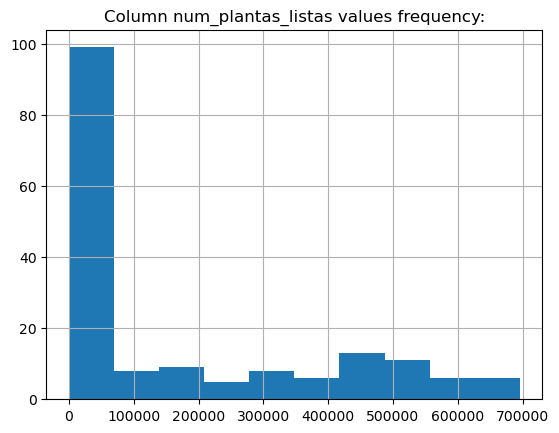

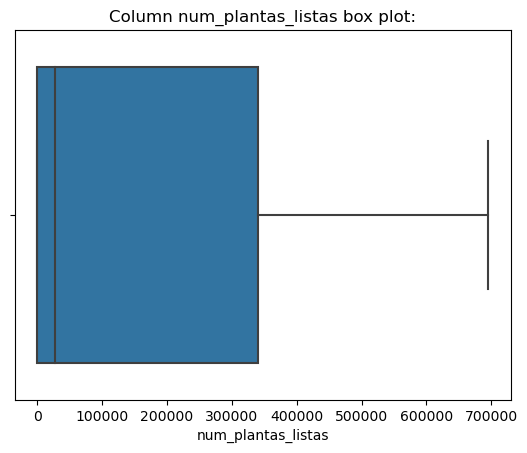

---
Column: temp_aire_promedioWin2avg
Column Type: float64
Sample value: 10.489285714285714
Number of unique values: 174
Percentage of unique values: 98.86%
Number of missing values: 2
Percentage of missing values: 1.14%

                           count       mean       std       min       25%   
temp_aire_promedioWin2avg  174.0  12.612024  6.969941 -2.607143  6.745714  \

                                 50%      75%        max  
temp_aire_promedioWin2avg  11.876071  18.9475  26.763571  

There are no outliers in column temp_aire_promedioWin2avg
No inliers detected in column temp_aire_promedioWin2avg
Column temp_aire_promedioWin2avg values frequency:


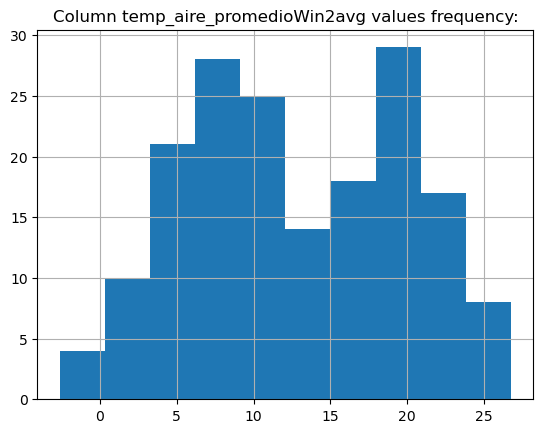

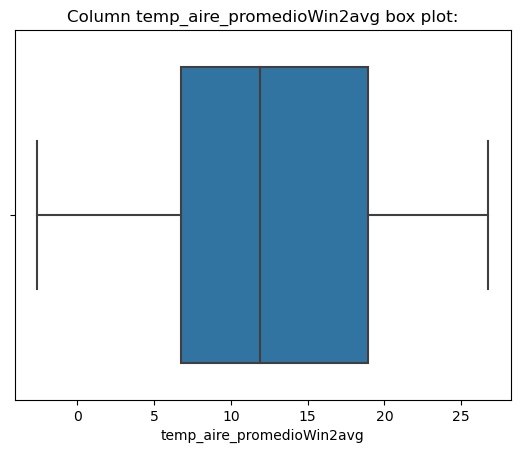

---
Column: temp_aire_maxWin2avg
Column Type: float64
Sample value: 17.284999999999997
Number of unique values: 175
Percentage of unique values: 99.43%
Number of missing values: 2
Percentage of missing values: 1.14%

                      count       mean       std       min        25%   
temp_aire_maxWin2avg  174.0  21.534191  8.370235  3.807143  14.075714  \

                            50%        75%        max  
temp_aire_maxWin2avg  20.630357  29.306071  38.309286  

There are no outliers in column temp_aire_maxWin2avg
No inliers detected in column temp_aire_maxWin2avg
Column temp_aire_maxWin2avg values frequency:


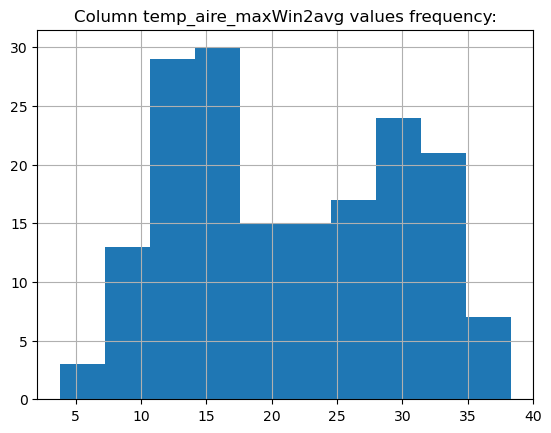

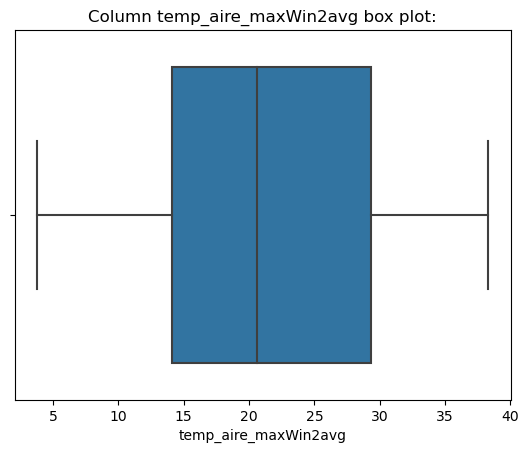

---
Column: temp_aire_minWin2avg
Column Type: float64
Sample value: 5.621428571428572
Number of unique values: 175
Percentage of unique values: 99.43%
Number of missing values: 2
Percentage of missing values: 1.14%

                      count      mean       std       min       25%       50%   
temp_aire_minWin2avg  174.0  4.636695  5.276215 -9.204286  0.740357  4.891071  \

                           75%        max  
temp_aire_minWin2avg  9.086429  13.771429  

There are no outliers in column temp_aire_minWin2avg
No inliers detected in column temp_aire_minWin2avg
Column temp_aire_minWin2avg values frequency:


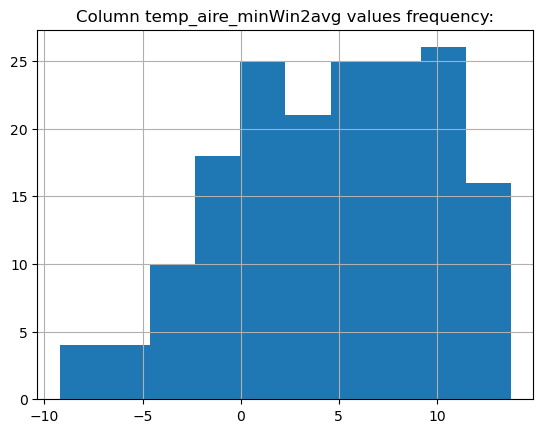

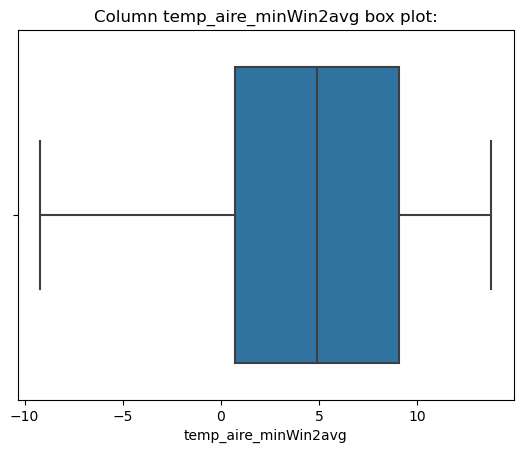

---
Column: humedad_relativa_promedioWin2avg
Column Type: float64
Sample value: 81.08642857142858
Number of unique values: 175
Percentage of unique values: 99.43%
Number of missing values: 2
Percentage of missing values: 1.14%

                                  count       mean        std    min   
humedad_relativa_promedioWin2avg  174.0  69.999458  13.865249  36.35  \

                                        25%        50%        75%        max  
humedad_relativa_promedioWin2avg  55.918393  72.458214  82.583929  91.238571  

There are no outliers in column humedad_relativa_promedioWin2avg
No inliers detected in column humedad_relativa_promedioWin2avg
Column humedad_relativa_promedioWin2avg values frequency:


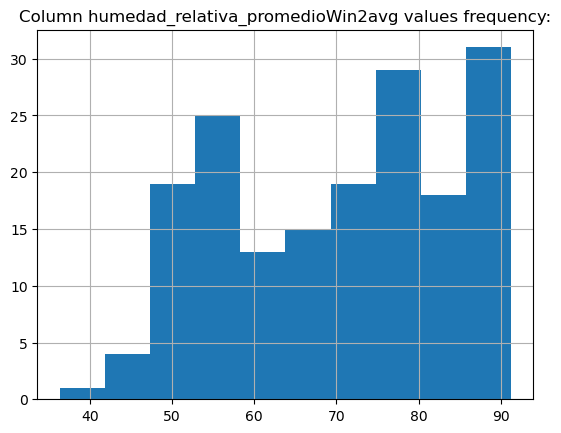

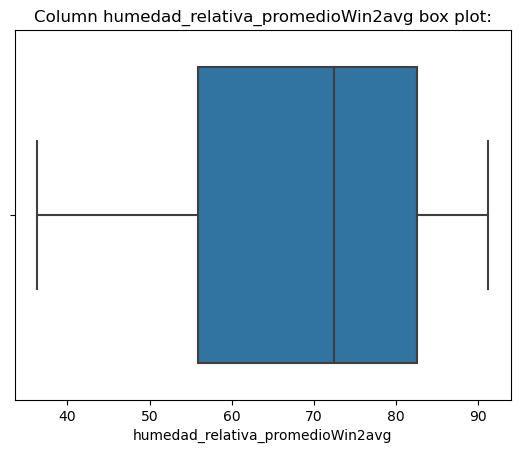

---
Column: humedad_relativa_maxWin2avg
Column Type: float64
Sample value: 97.94285714285716
Number of unique values: 175
Percentage of unique values: 99.43%
Number of missing values: 2
Percentage of missing values: 1.14%

                             count       mean       std     min        25%   
humedad_relativa_maxWin2avg  174.0  95.803477  3.682303  80.195  94.301964  \

                                50%        75%        max  
humedad_relativa_maxWin2avg  97.055  98.539821  99.318571  

Sample of outliers: [85.72571428571429, 86.4557142857143, 86.89071428571428, 87.83, 82.88, 87.16571428571429, 80.195, 84.32857142857142, 87.50785714285715]
Sample of outliers over Q3: []
Sample of outliers below Q1: [87.83, 87.50785714285715, 87.16571428571429, 86.89071428571428, 86.4557142857143, 85.72571428571429, 84.32857142857142, 82.88, 80.195]
No inliers detected in column humedad_relativa_maxWin2avg
Column humedad_relativa_maxWin2avg values frequency:


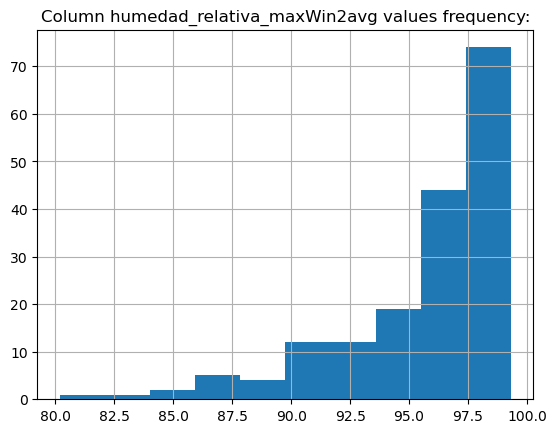

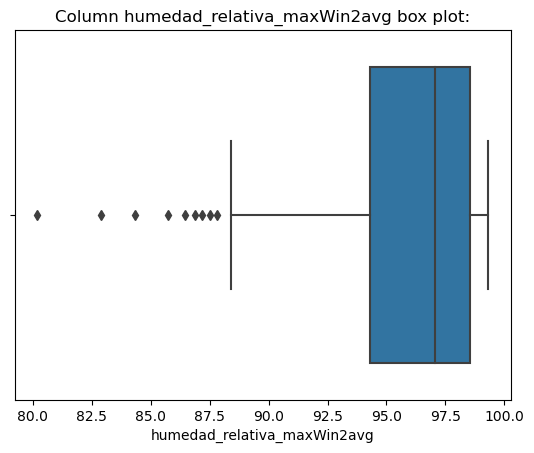

---
Column: humedad_relativa_minWin2avg
Column Type: float64
Sample value: 47.25857142857143
Number of unique values: 174
Percentage of unique values: 98.86%
Number of missing values: 2
Percentage of missing values: 1.14%

                             count       mean        std       min        25%   
humedad_relativa_minWin2avg  174.0  36.646404  16.180671  9.075714  21.231786  \

                                   50%        75%        max  
humedad_relativa_minWin2avg  35.981429  50.004643  71.529286  

There are no outliers in column humedad_relativa_minWin2avg
No inliers detected in column humedad_relativa_minWin2avg
Column humedad_relativa_minWin2avg values frequency:


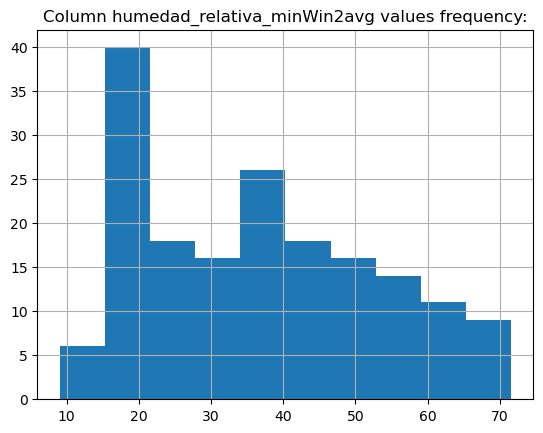

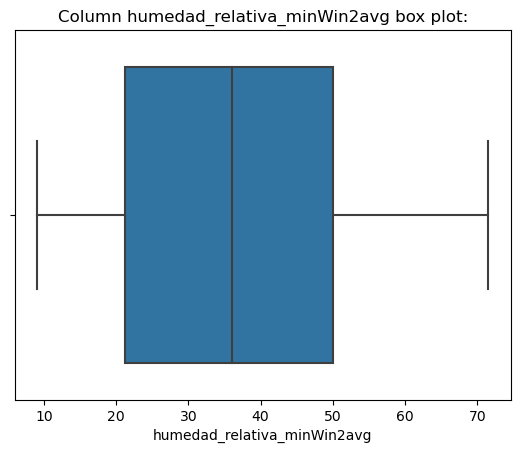

---
Column: temp_aire_promedioWin3avg
Column Type: float64
Sample value: 11.387142857142855
Number of unique values: 174
Percentage of unique values: 98.86%
Number of missing values: 3
Percentage of missing values: 1.70%

                           count       mean       std       min       25%   
temp_aire_promedioWin3avg  173.0  12.586658  6.884449 -1.486667  6.421905  \

                                 50%        75%        max  
temp_aire_promedioWin3avg  11.777619  18.798095  25.478571  

There are no outliers in column temp_aire_promedioWin3avg
No inliers detected in column temp_aire_promedioWin3avg
Column temp_aire_promedioWin3avg values frequency:


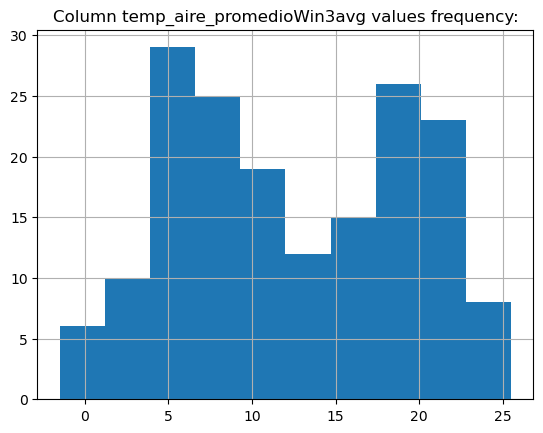

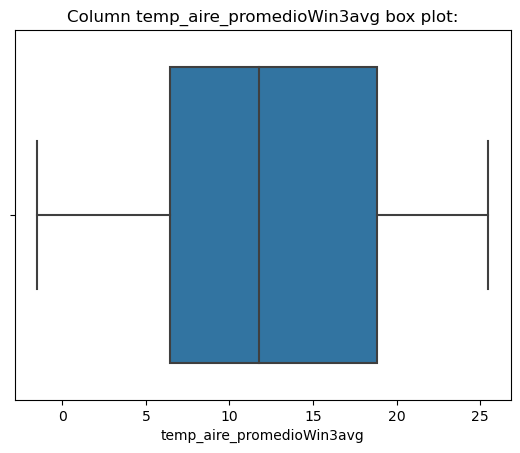

---
Column: temp_aire_maxWin3avg
Column Type: float64
Sample value: 18.943809523809524
Number of unique values: 174
Percentage of unique values: 98.86%
Number of missing values: 3
Percentage of missing values: 1.70%

                      count       mean       std       min        25%   
temp_aire_maxWin3avg  173.0  21.502568  8.260884  4.882381  14.460476  \

                            50%        75%        max  
temp_aire_maxWin3avg  20.540476  29.098095  37.083333  

There are no outliers in column temp_aire_maxWin3avg
No inliers detected in column temp_aire_maxWin3avg
Column temp_aire_maxWin3avg values frequency:


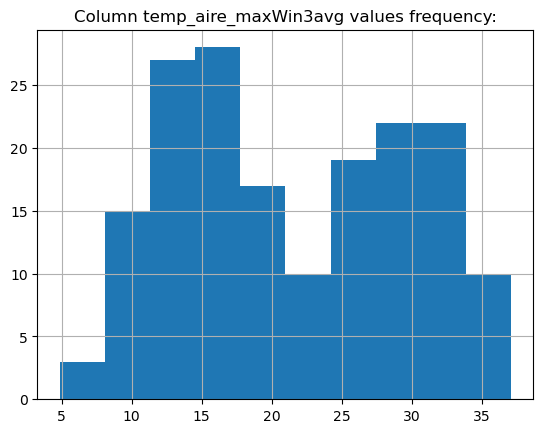

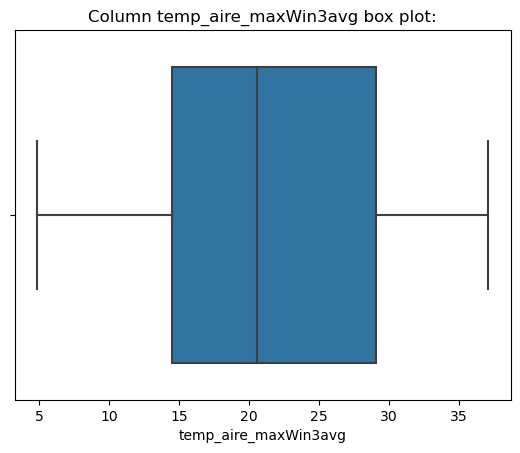

---
Column: temp_aire_minWin3avg
Column Type: float64
Sample value: 5.1966666666666645
Number of unique values: 174
Percentage of unique values: 98.86%
Number of missing values: 3
Percentage of missing values: 1.70%

                      count      mean       std       min  25%       50%   
temp_aire_minWin3avg  173.0  4.624019  5.143454 -8.336667  0.7  4.866667  \

                           75%        max  
temp_aire_minWin3avg  8.999048  12.971905  

There are no outliers in column temp_aire_minWin3avg
No inliers detected in column temp_aire_minWin3avg
Column temp_aire_minWin3avg values frequency:


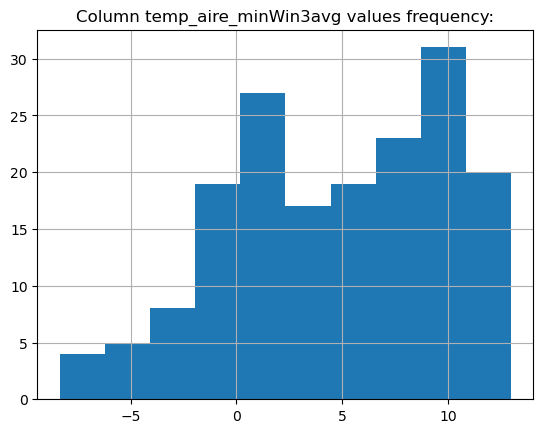

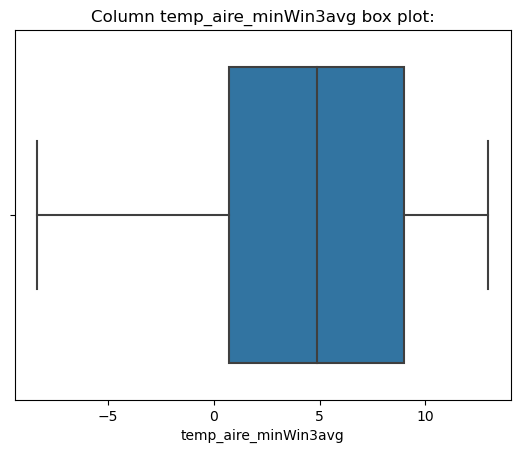

---
Column: humedad_relativa_promedioWin3avg
Column Type: float64
Sample value: 76.67
Number of unique values: 174
Percentage of unique values: 98.86%
Number of missing values: 3
Percentage of missing values: 1.70%

                                  count       mean        std        min   
humedad_relativa_promedioWin3avg  173.0  70.067085  13.570883  40.972857  \

                                        25%        50%        75%        max  
humedad_relativa_promedioWin3avg  57.680952  73.090476  81.904286  91.291905  

There are no outliers in column humedad_relativa_promedioWin3avg
No inliers detected in column humedad_relativa_promedioWin3avg
Column humedad_relativa_promedioWin3avg values frequency:


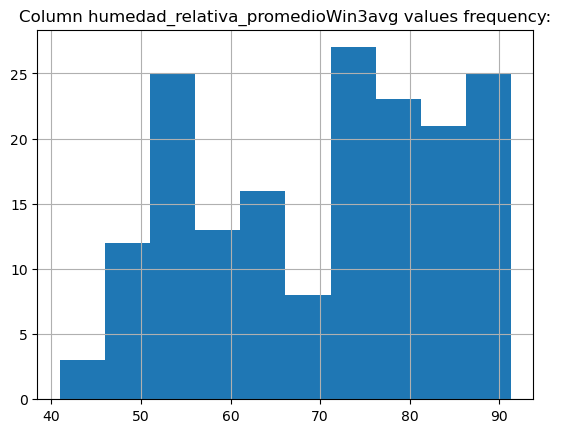

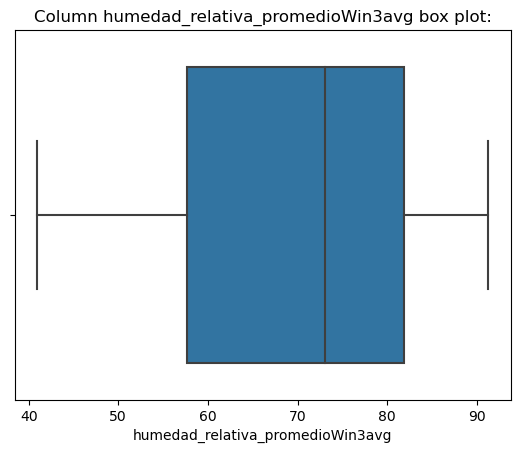

---
Column: humedad_relativa_maxWin3avg
Column Type: float64
Sample value: 98.37190476190476
Number of unique values: 174
Percentage of unique values: 98.86%
Number of missing values: 3
Percentage of missing values: 1.70%

                             count       mean       std        min        25%   
humedad_relativa_maxWin3avg  173.0  95.820435  3.450573  84.459048  94.403333  \

                                   50%        75%        max  
humedad_relativa_maxWin3avg  97.149048  98.236667  99.318571  

Sample of outliers: [84.57190476190476, 86.46333333333332, 88.22714285714285, 87.21142857142858, 86.02238095238094, 84.82761904761905, 86.89714285714285, 88.19761904761906, 84.45904761904762]
Sample of outliers over Q3: []
Sample of outliers below Q1: [88.22714285714285, 88.19761904761906, 87.21142857142858, 86.89714285714285, 86.46333333333332, 86.02238095238094, 84.82761904761905, 84.57190476190476, 84.45904761904762]
No inliers detected in column humedad_relativa_maxWin3avg
Colum

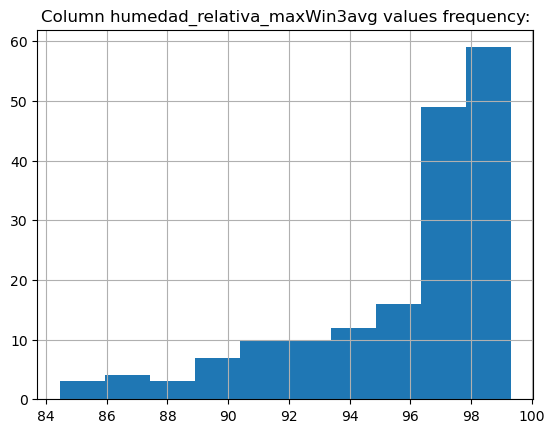

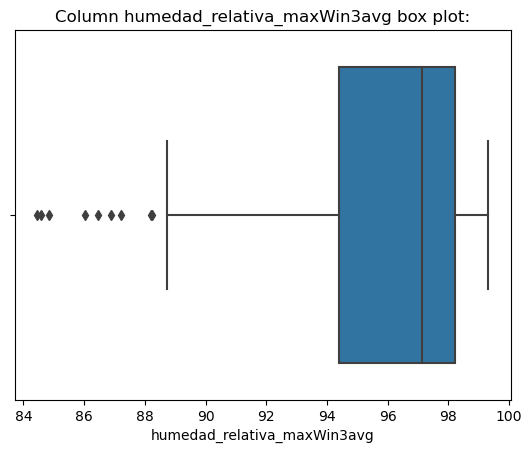

---
Column: humedad_relativa_minWin3avg
Column Type: float64
Sample value: 41.34761904761905
Number of unique values: 174
Percentage of unique values: 98.86%
Number of missing values: 3
Percentage of missing values: 1.70%

                             count       mean        std        min       25%   
humedad_relativa_minWin3avg  173.0  36.714005  15.808287  10.992857  21.53381  \

                                   50%        75%        max  
humedad_relativa_minWin3avg  35.685238  48.978571  71.297143  

There are no outliers in column humedad_relativa_minWin3avg
No inliers detected in column humedad_relativa_minWin3avg
Column humedad_relativa_minWin3avg values frequency:


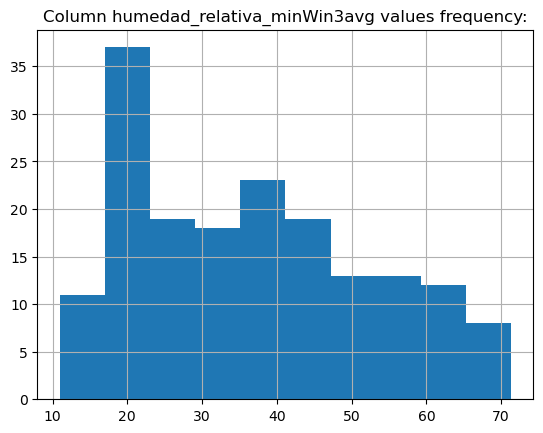

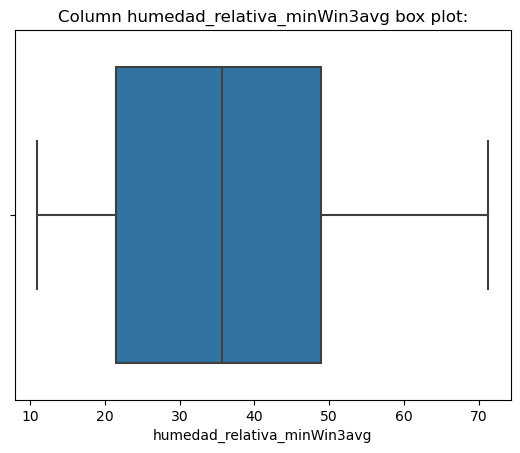

---
Column: temp_aire_promedioWin4avg
Column Type: float64
Sample value: 10.653214285714284
Number of unique values: 173
Percentage of unique values: 98.30%
Number of missing values: 4
Percentage of missing values: 2.27%

                           count       mean       std       min     25%   
temp_aire_promedioWin4avg  172.0  12.562162  6.824036 -0.095714  6.5625  \

                                50%        75%        max  
temp_aire_promedioWin4avg  11.97375  18.737589  25.500714  

There are no outliers in column temp_aire_promedioWin4avg
No inliers detected in column temp_aire_promedioWin4avg
Column temp_aire_promedioWin4avg values frequency:


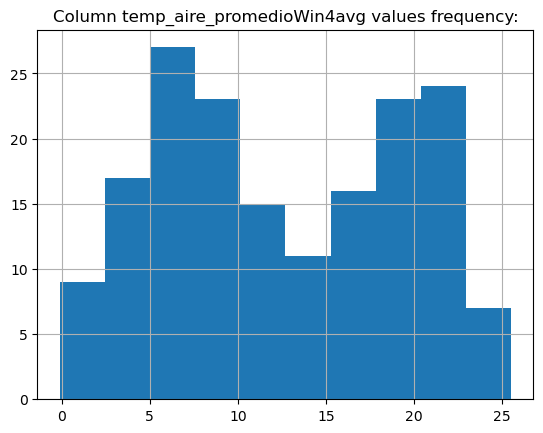

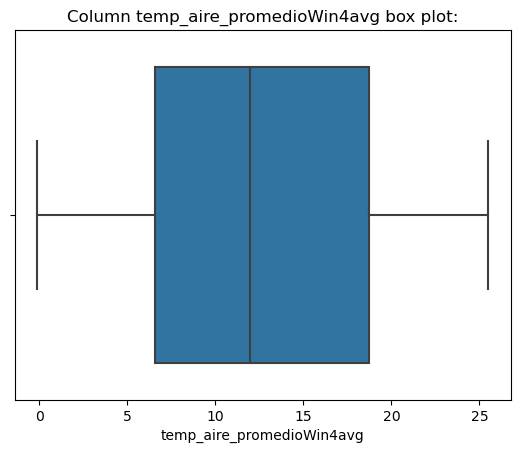

---
Column: temp_aire_maxWin4avg
Column Type: float64
Sample value: 18.32785714285714
Number of unique values: 173
Percentage of unique values: 98.30%
Number of missing values: 4
Percentage of missing values: 2.27%

                      count       mean       std     min       25%        50%   
temp_aire_maxWin4avg  172.0  21.473929  8.180954  6.1475  14.20625  19.985714  \

                            75%        max  
temp_aire_maxWin4avg  29.109375  36.945357  

There are no outliers in column temp_aire_maxWin4avg
No inliers detected in column temp_aire_maxWin4avg
Column temp_aire_maxWin4avg values frequency:


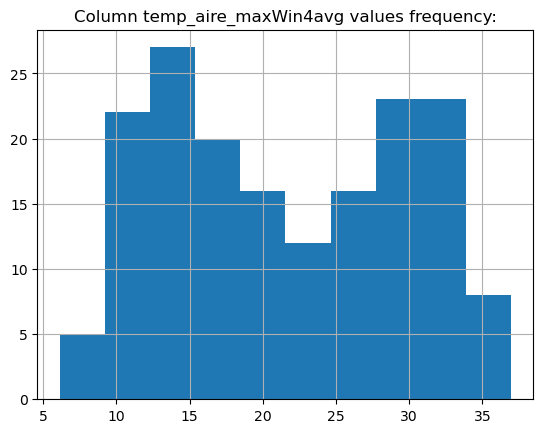

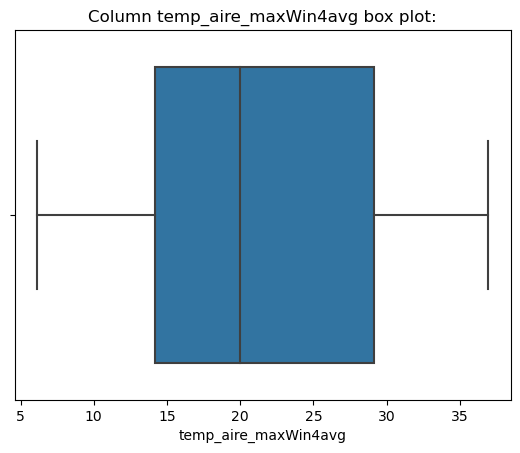

---
Column: temp_aire_minWin4avg
Column Type: float64
Sample value: 4.0235714285714295
Number of unique values: 173
Percentage of unique values: 98.30%
Number of missing values: 4
Percentage of missing values: 2.27%

                      count      mean       std       min       25%       50%   
temp_aire_minWin4avg  172.0  4.610436  5.049499 -7.789643  0.334554  4.908929  \

                           75%        max  
temp_aire_minWin4avg  9.201696  12.981429  

There are no outliers in column temp_aire_minWin4avg
No inliers detected in column temp_aire_minWin4avg
Column temp_aire_minWin4avg values frequency:


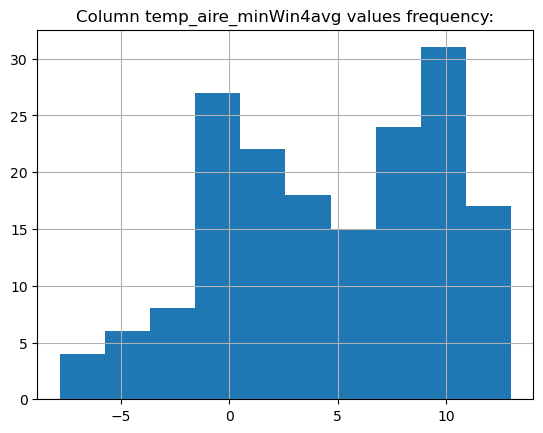

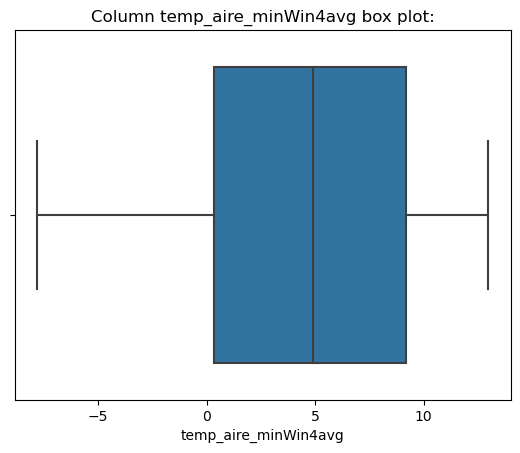

---
Column: humedad_relativa_promedioWin4avg
Column Type: float64
Sample value: 74.28214285714286
Number of unique values: 173
Percentage of unique values: 98.30%
Number of missing values: 4
Percentage of missing values: 2.27%

                                  count       mean        std        min   
humedad_relativa_promedioWin4avg  172.0  70.134645  13.360573  42.470357  \

                                        25%        50%        75%        max  
humedad_relativa_promedioWin4avg  58.429821  73.706429  81.450357  90.166786  

There are no outliers in column humedad_relativa_promedioWin4avg
No inliers detected in column humedad_relativa_promedioWin4avg
Column humedad_relativa_promedioWin4avg values frequency:


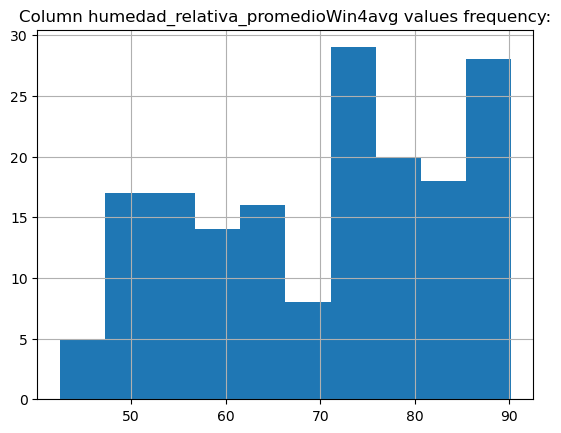

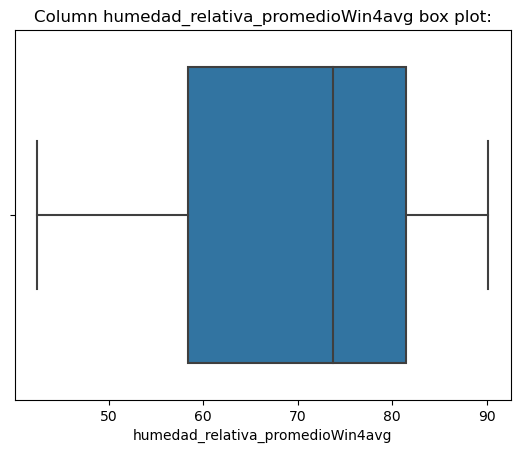

---
Column: humedad_relativa_maxWin4avg
Column Type: float64
Sample value: 98.22464285714284
Number of unique values: 171
Percentage of unique values: 97.16%
Number of missing values: 4
Percentage of missing values: 2.27%

                             count       mean       std        min        25%   
humedad_relativa_maxWin4avg  172.0  95.836672  3.296935  84.885357  93.921696  \

                                   50%        75%        max  
humedad_relativa_maxWin4avg  97.276429  98.053482  99.313929  

Sample of outliers: [86.8475, 85.39214285714286, 84.88535714285715, 87.435, 87.54607142857142, 87.02821428571428, 87.35357142857143]
Sample of outliers over Q3: []
Sample of outliers below Q1: [87.54607142857142, 87.435, 87.35357142857143, 87.02821428571428, 86.8475, 85.39214285714286, 84.88535714285715]
No inliers detected in column humedad_relativa_maxWin4avg
Column humedad_relativa_maxWin4avg values frequency:


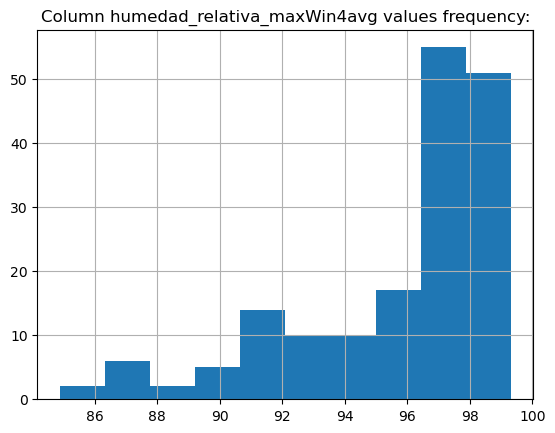

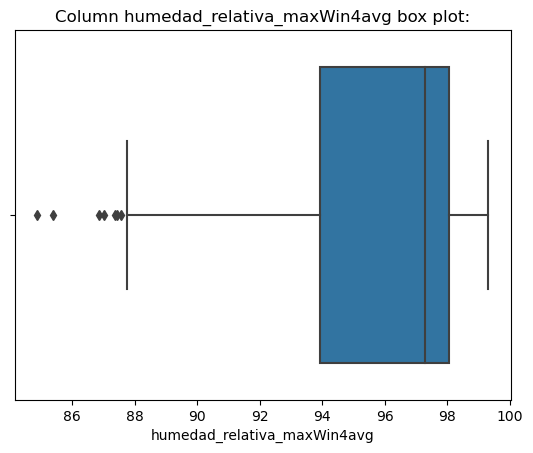

---
Column: humedad_relativa_minWin4avg
Column Type: float64
Sample value: 39.81892857142857
Number of unique values: 173
Percentage of unique values: 98.30%
Number of missing values: 4
Percentage of missing values: 2.27%

                             count       mean        std        min   
humedad_relativa_minWin4avg  172.0  36.785401  15.481131  11.699643  \

                                   25%        50%        75%        max  
humedad_relativa_minWin4avg  21.998304  36.618929  48.830089  67.397143  

There are no outliers in column humedad_relativa_minWin4avg
No inliers detected in column humedad_relativa_minWin4avg
Column humedad_relativa_minWin4avg values frequency:


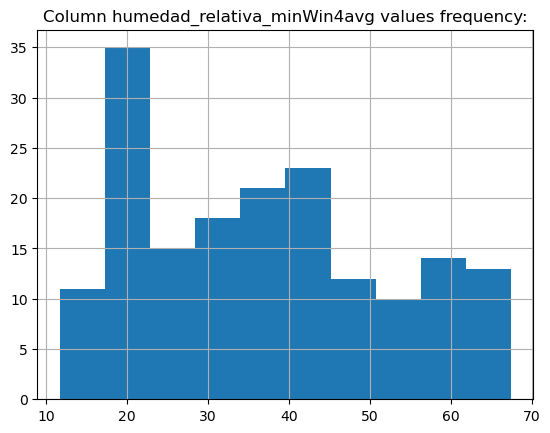

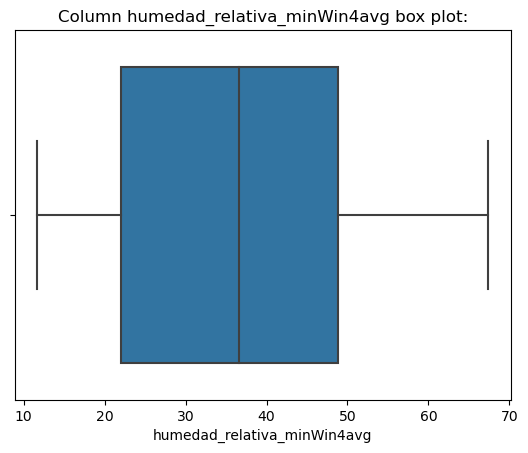

---
Column: temp_aire_promedioWin5avg
Column Type: float64
Sample value: 10.892571428571427
Number of unique values: 172
Percentage of unique values: 97.73%
Number of missing values: 5
Percentage of missing values: 2.84%

                           count       mean       std       min       25%   
temp_aire_promedioWin5avg  171.0  12.538431  6.772982  0.838857  6.704714  \

                              50%        75%        max  
temp_aire_promedioWin5avg  12.102  18.821857  25.222571  

There are no outliers in column temp_aire_promedioWin5avg
No inliers detected in column temp_aire_promedioWin5avg
Column temp_aire_promedioWin5avg values frequency:


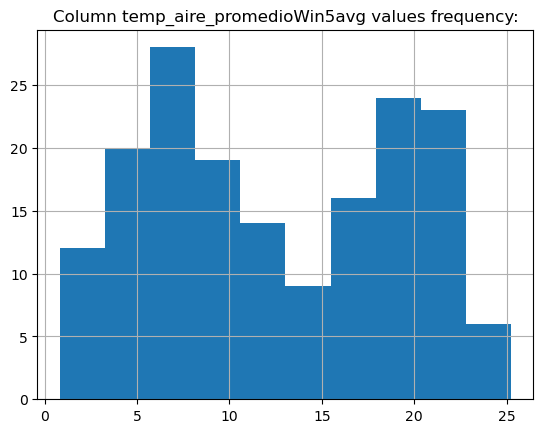

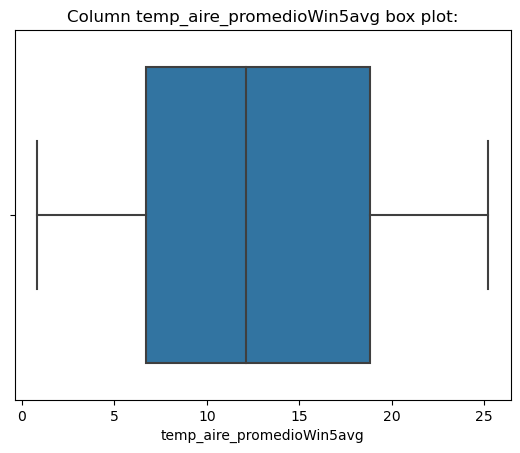

---
Column: temp_aire_maxWin5avg
Column Type: float64
Sample value: 18.24
Number of unique values: 172
Percentage of unique values: 97.73%
Number of missing values: 5
Percentage of missing values: 2.84%

                      count       mean       std       min        25%   
temp_aire_maxWin5avg  171.0  21.444302  8.113862  7.100857  13.937857  \

                            50%     75%        max  
temp_aire_maxWin5avg  19.963714  29.084  36.482571  

There are no outliers in column temp_aire_maxWin5avg
No inliers detected in column temp_aire_maxWin5avg
Column temp_aire_maxWin5avg values frequency:


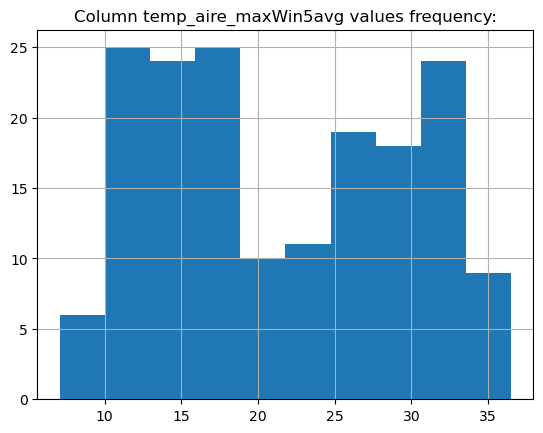

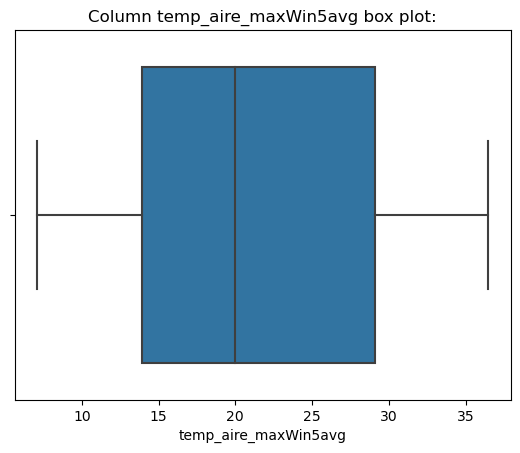

---
Column: temp_aire_minWin5avg
Column Type: float64
Sample value: 4.583428571428572
Number of unique values: 172
Percentage of unique values: 97.73%
Number of missing values: 5
Percentage of missing values: 2.84%

                      count      mean       std       min       25%    50%   
temp_aire_minWin5avg  171.0  4.598703  4.975224 -7.174286  0.116571  5.076  \

                           75%        max  
temp_aire_minWin5avg  9.157143  13.203429  

There are no outliers in column temp_aire_minWin5avg
No inliers detected in column temp_aire_minWin5avg
Column temp_aire_minWin5avg values frequency:


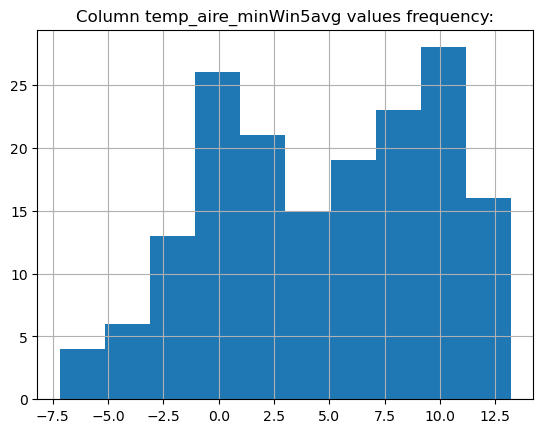

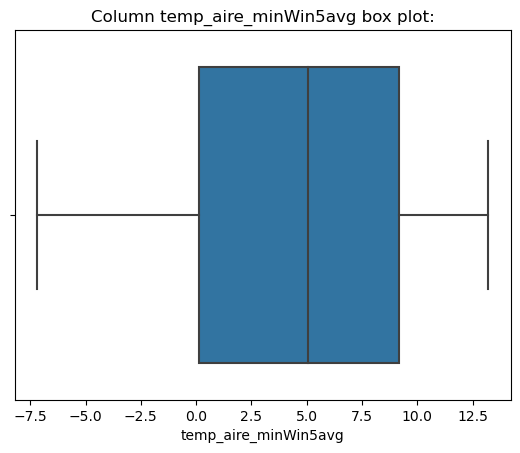

---
Column: humedad_relativa_promedioWin5avg
Column Type: float64
Sample value: 73.8797142857143
Number of unique values: 172
Percentage of unique values: 97.73%
Number of missing values: 5
Percentage of missing values: 2.84%

                                  count       mean        std        min   
humedad_relativa_promedioWin5avg  171.0  70.209153  13.165565  44.295143  \

                                        25%        50%        75%     max  
humedad_relativa_promedioWin5avg  58.384571  73.234857  81.603286  90.554  

There are no outliers in column humedad_relativa_promedioWin5avg
No inliers detected in column humedad_relativa_promedioWin5avg
Column humedad_relativa_promedioWin5avg values frequency:


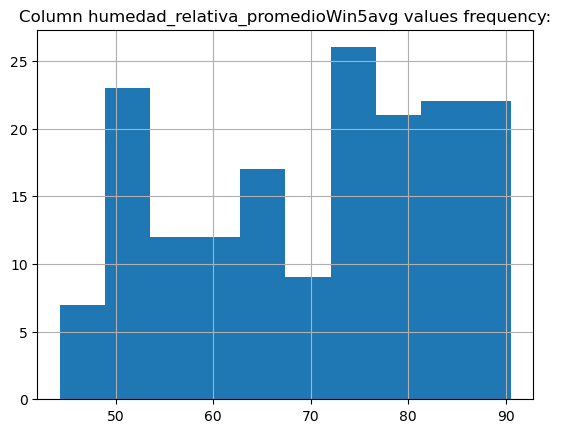

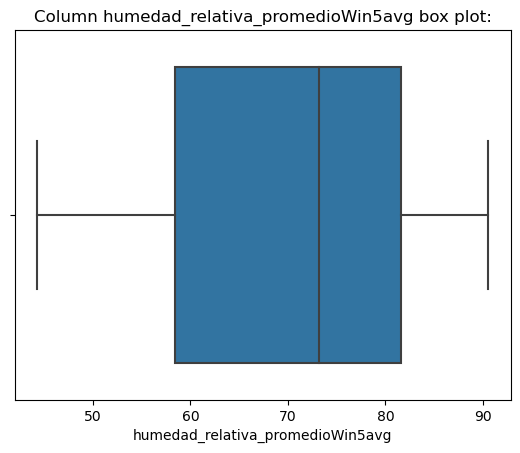

---
Column: humedad_relativa_maxWin5avg
Column Type: float64
Sample value: 97.81571428571428
Number of unique values: 171
Percentage of unique values: 97.16%
Number of missing values: 5
Percentage of missing values: 2.84%

                             count       mean       std        min        25%   
humedad_relativa_maxWin5avg  171.0  95.855708  3.161648  85.478857  94.051286  \

                                   50%        75%        max  
humedad_relativa_maxWin5avg  97.276571  97.967714  99.171429  

Sample of outliers: [85.47885714285715, 85.60942857142857, 87.69257142857143, 86.89457142857142, 87.99771428571428, 87.78142857142856]
Sample of outliers over Q3: []
Sample of outliers below Q1: [87.99771428571428, 87.78142857142856, 87.69257142857143, 86.89457142857142, 85.60942857142857, 85.47885714285715]
No inliers detected in column humedad_relativa_maxWin5avg
Column humedad_relativa_maxWin5avg values frequency:


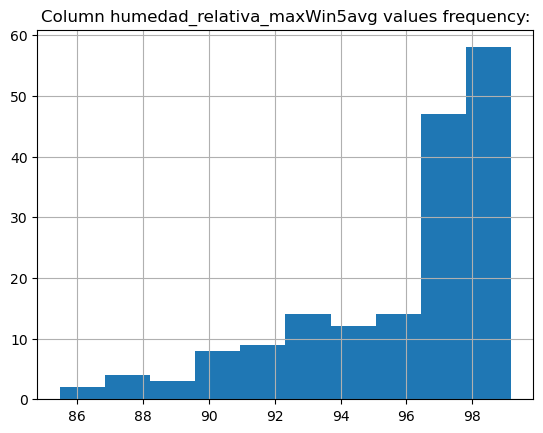

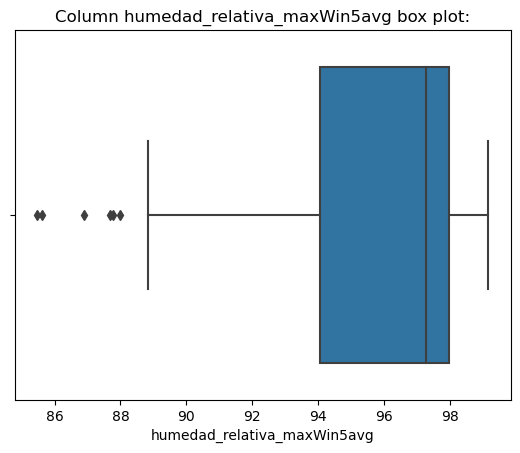

---
Column: humedad_relativa_minWin5avg
Column Type: float64
Sample value: 40.477714285714285
Number of unique values: 172
Percentage of unique values: 97.73%
Number of missing values: 5
Percentage of missing values: 2.84%

                             count       mean        std        min   
humedad_relativa_minWin5avg  171.0  36.871666  15.202901  12.325143  \

                                   25%        50%        75%        max  
humedad_relativa_minWin5avg  23.168857  36.250857  48.237286  66.690857  

There are no outliers in column humedad_relativa_minWin5avg
No inliers detected in column humedad_relativa_minWin5avg
Column humedad_relativa_minWin5avg values frequency:


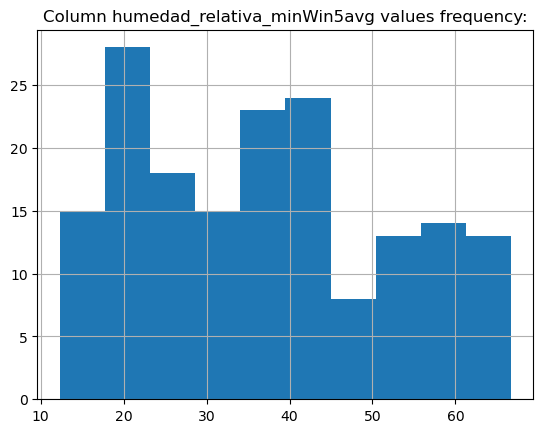

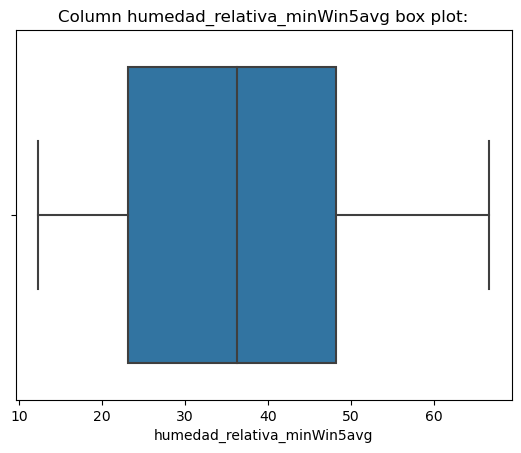

---
Column: temp_aire_promedioWin6avg
Column Type: float64
Sample value: 10.577619047619049
Number of unique values: 171
Percentage of unique values: 97.16%
Number of missing values: 6
Percentage of missing values: 3.41%

                           count       mean       std      min       25%   
temp_aire_promedioWin6avg  170.0  12.506179  6.714641  1.50119  6.744167  \

                                 50%        75%    max  
temp_aire_promedioWin6avg  11.880238  19.134881  24.71  

There are no outliers in column temp_aire_promedioWin6avg
No inliers detected in column temp_aire_promedioWin6avg
Column temp_aire_promedioWin6avg values frequency:


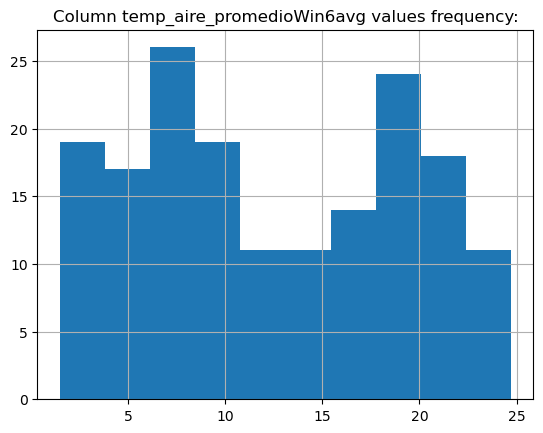

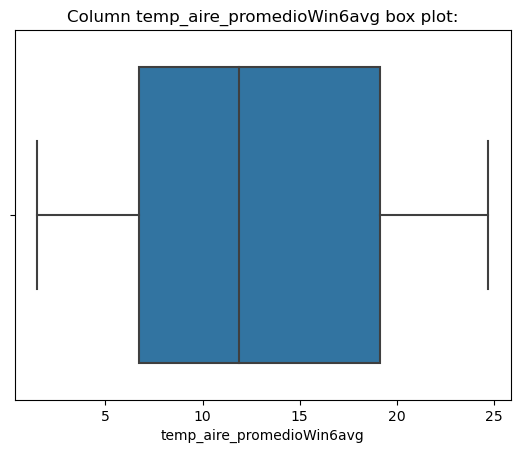

---
Column: temp_aire_maxWin6avg
Column Type: float64
Sample value: 18.285476190476192
Number of unique values: 171
Percentage of unique values: 97.16%
Number of missing values: 6
Percentage of missing values: 3.41%

                      count       mean       std       min        25%   
temp_aire_maxWin6avg  170.0  21.404789  8.038749  7.588095  13.934345  \

                            50%       75%        max  
temp_aire_maxWin6avg  20.153214  29.07631  36.033095  

There are no outliers in column temp_aire_maxWin6avg
No inliers detected in column temp_aire_maxWin6avg
Column temp_aire_maxWin6avg values frequency:


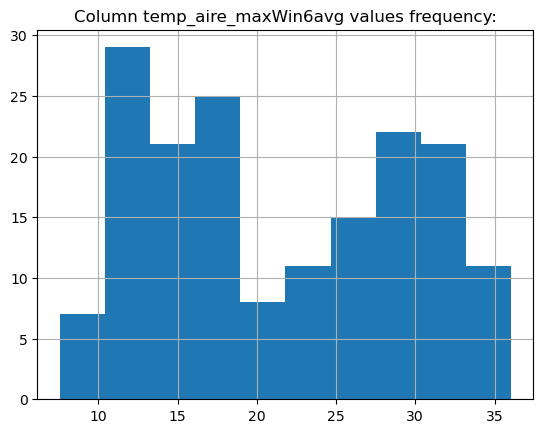

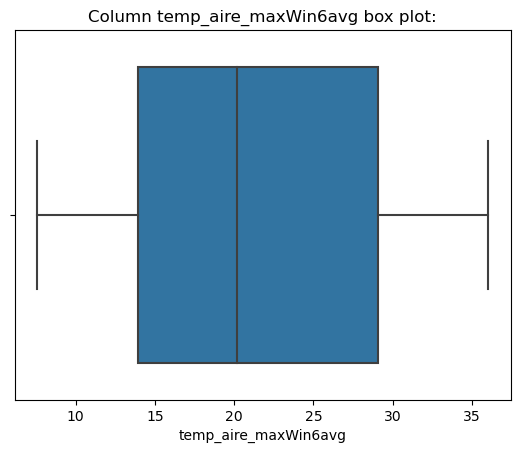

---
Column: temp_aire_minWin6avg
Column Type: float64
Sample value: 3.948809523809524
Number of unique values: 171
Percentage of unique values: 97.16%
Number of missing values: 6
Percentage of missing values: 3.41%

                      count      mean       std       min       25%       50%   
temp_aire_minWin6avg  170.0  4.579839  4.911658 -6.397619  0.308929  4.831786  \

                           75%        max  
temp_aire_minWin6avg  9.177381  12.673095  

There are no outliers in column temp_aire_minWin6avg
No inliers detected in column temp_aire_minWin6avg
Column temp_aire_minWin6avg values frequency:


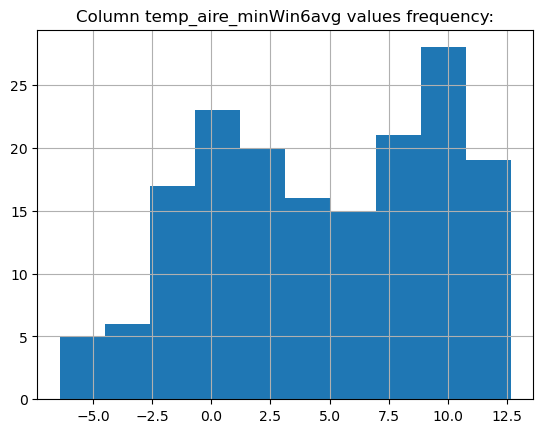

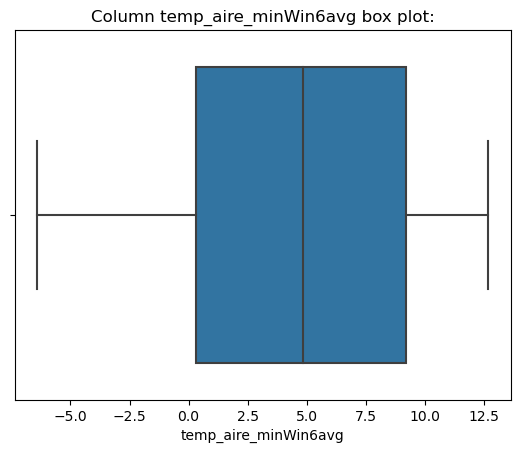

---
Column: humedad_relativa_promedioWin6avg
Column Type: float64
Sample value: 73.48690476190477
Number of unique values: 171
Percentage of unique values: 97.16%
Number of missing values: 6
Percentage of missing values: 3.41%

                                  count       mean        std        min   
humedad_relativa_promedioWin6avg  170.0  70.291132  12.989298  45.752143  \

                                        25%        50%        75%        max  
humedad_relativa_promedioWin6avg  58.542381  72.710952  81.611369  89.926905  

There are no outliers in column humedad_relativa_promedioWin6avg
No inliers detected in column humedad_relativa_promedioWin6avg
Column humedad_relativa_promedioWin6avg values frequency:


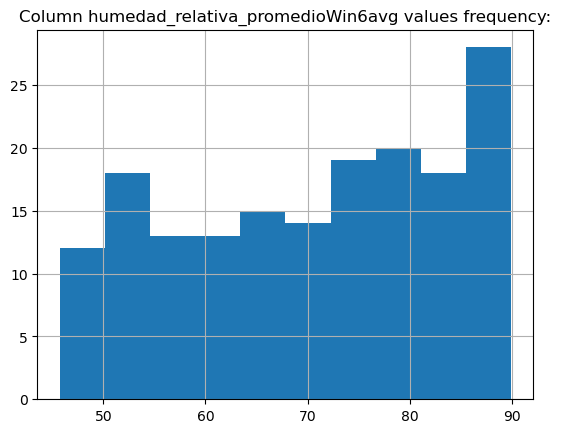

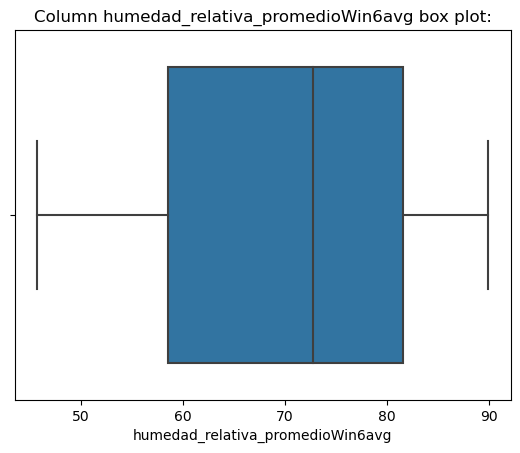

---
Column: humedad_relativa_maxWin6avg
Column Type: float64
Sample value: 97.27285714285716
Number of unique values: 171
Percentage of unique values: 97.16%
Number of missing values: 6
Percentage of missing values: 3.41%

                             count       mean      std        min       25%   
humedad_relativa_maxWin6avg  170.0  95.873662  3.04495  85.645476  94.10131  \

                                   50%        75%        max  
humedad_relativa_maxWin6avg  97.258452  97.958095  99.185238  

Sample of outliers: [86.39952380952381, 85.64547619047619, 87.05428571428571, 87.32761904761905, 88.11857142857143]
Sample of outliers over Q3: []
Sample of outliers below Q1: [88.11857142857143, 87.32761904761905, 87.05428571428571, 86.39952380952381, 85.64547619047619]
No inliers detected in column humedad_relativa_maxWin6avg
Column humedad_relativa_maxWin6avg values frequency:


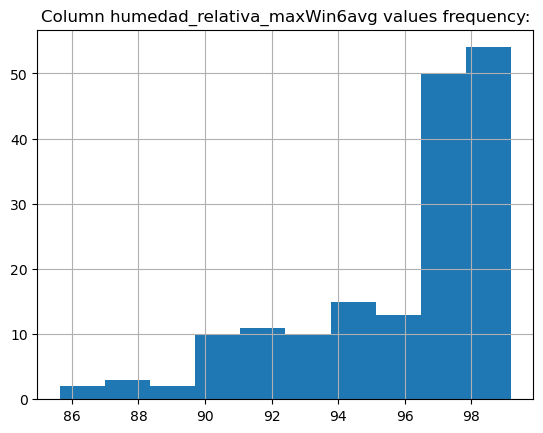

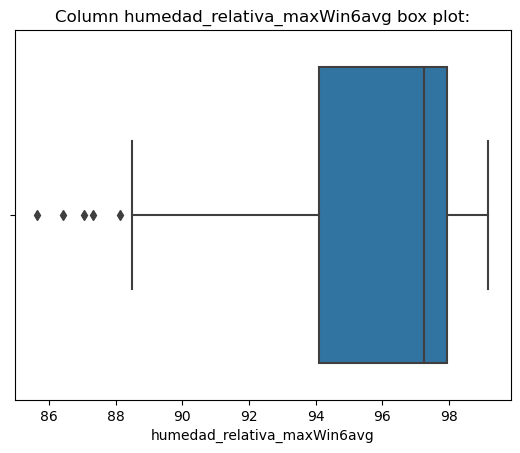

---
Column: humedad_relativa_minWin6avg
Column Type: float64
Sample value: 40.12714285714285
Number of unique values: 171
Percentage of unique values: 97.16%
Number of missing values: 6
Percentage of missing values: 3.41%

                             count       mean        std        min   
humedad_relativa_minWin6avg  170.0  36.961976  14.964064  13.087619  \

                                   25%        50%        75%        max  
humedad_relativa_minWin6avg  23.058214  36.350595  47.943036  66.237143  

There are no outliers in column humedad_relativa_minWin6avg
No inliers detected in column humedad_relativa_minWin6avg
Column humedad_relativa_minWin6avg values frequency:


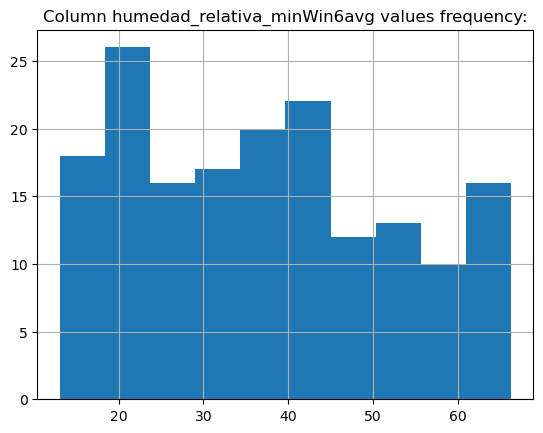

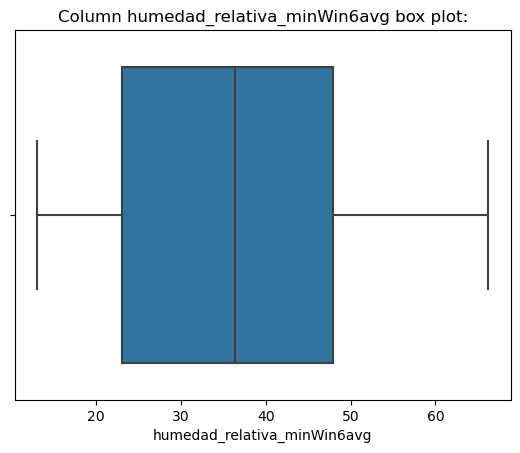

---
Column: fecha
Column Type: object
See Converted_fecha column below for a detailed analysis.
Sample value: 2021-05-02
Number of unique values: 176
Percentage of unique values: 100.00%
Number of missing values: 0
Percentage of missing values: 0.00%
---
Column: Converted_fecha
Column Type: datetime64[ns]
Sample value: 2021-05-02 00:00:00
Number of unique values: 176
Percentage of unique values: 100.00%
Number of missing values: 0
Percentage of missing values: 0.00%
Global Series Start Datetime: 2019-05-26 00:00:00
Global Series End Datetime: 2022-10-02 00:00:00
Global Series Period: 1225 days 00:00:00
Count of observations per timestamp in: Converted_fecha:


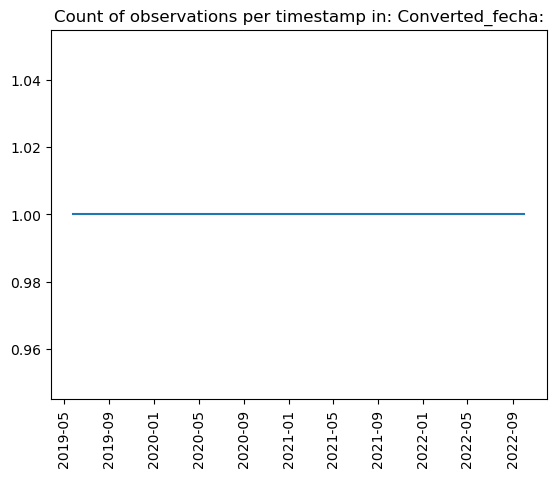

Count of observations per date (day) in: Converted_fecha:


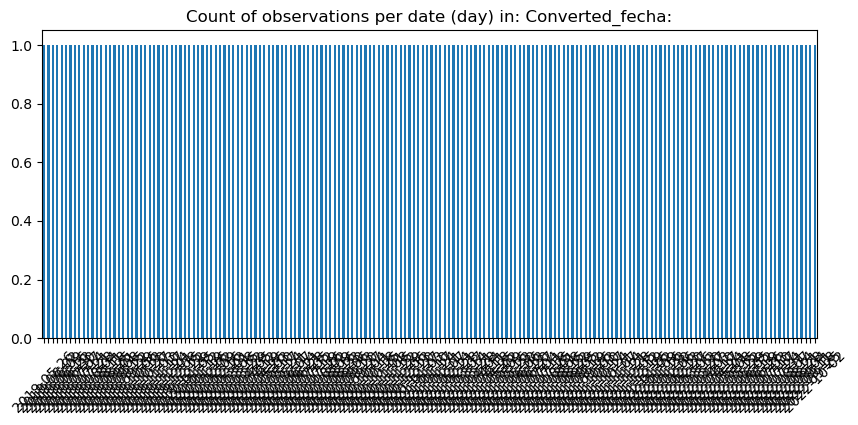

Observations per month of the year in Converted_fecha


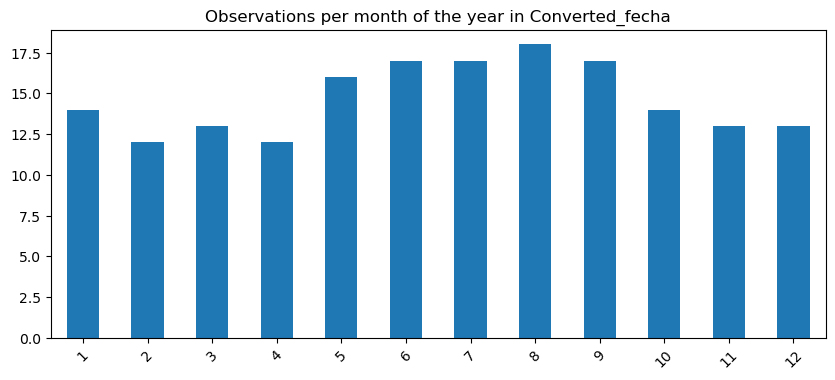

Observations per day of the month in Converted_fecha


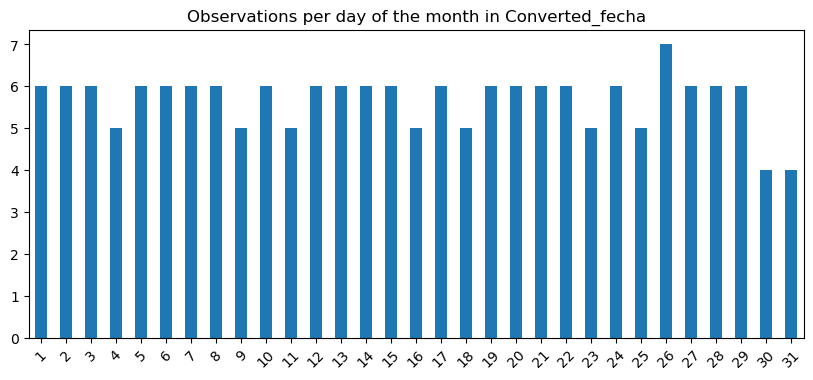

Observations per hour of the day in Converted_fecha


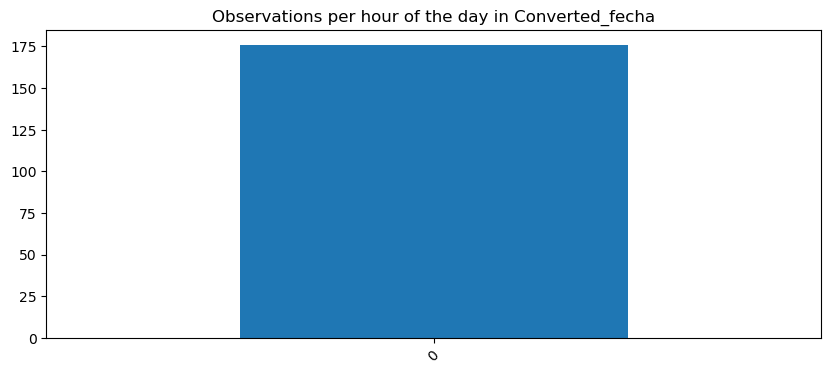

Observations per day of the week in Converted_fecha


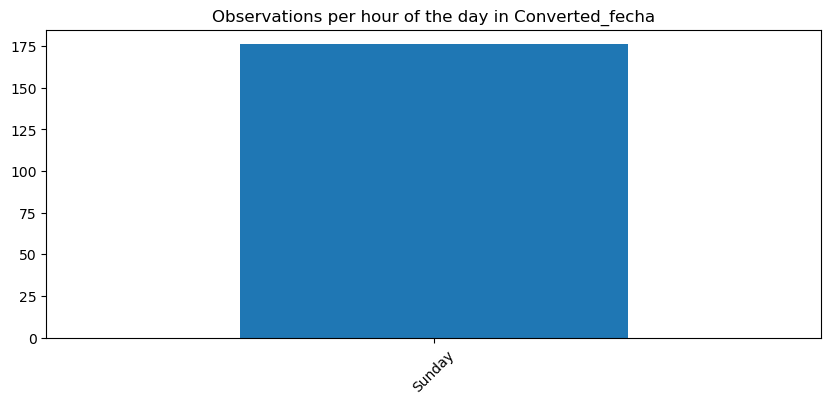

Time step is regular: 604800.0 seconds
Column Converted_fecha time steps frequency (hours):


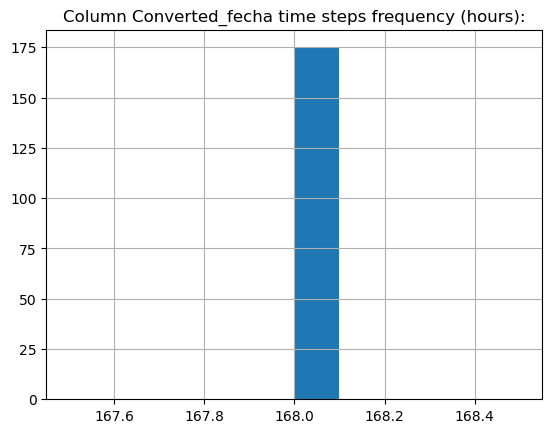

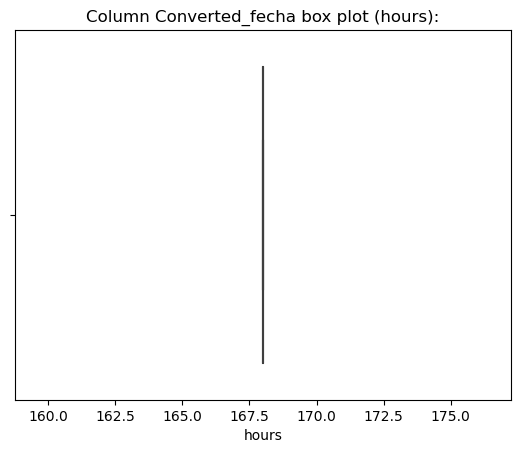

Column Converted_fecha time steps frequency (days):


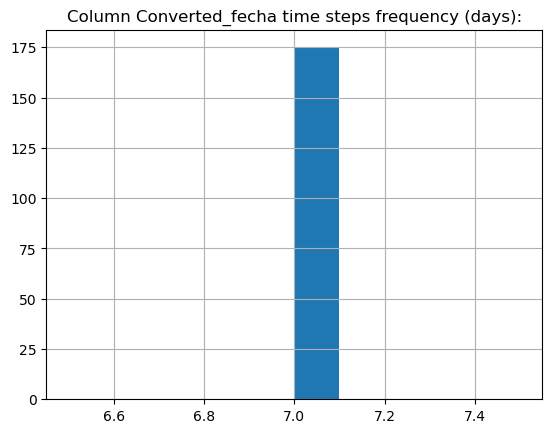

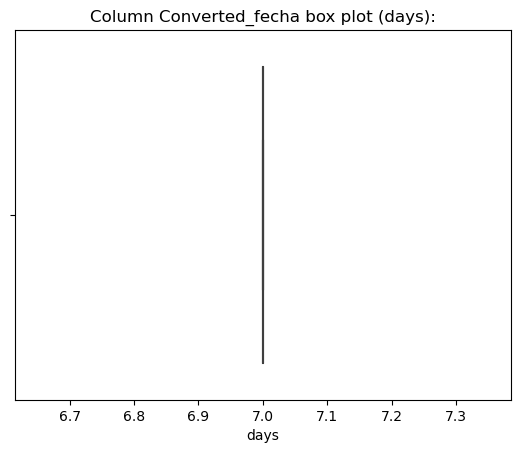

---


<Figure size 640x480 with 0 Axes>

In [19]:
blank_line(pdf)
duoprint("Columns Univariate Analysis", pdf, box=True)

for c in df.columns: 
    blank_line(pdf)
    
    # COLUMN NAME
    col_name = "Column: " + c
    duoprint(col_name, pdf, marker=True)
    
    # COLUMN TYPE
    type_info = "Column Type: " + str(df[c].dtype)
    duoprint(type_info, pdf)
    
    # OBJECT COLUMNS ARE ANALYZED USING THEIR "Converted_" versions
    if df[c].dtype == 'object':
        duoprint("See Converted_" + c + " column below for a detailed analysis.", pdf, warning=True)
        
    # SAMPLE VALUE
    sample_info = "Sample value: " + str(df[c].sample(n=1, ignore_index=True, random_state=r_seed).iloc[-1])
    duoprint(sample_info, pdf)
    
    # NUMBER OF UNIQUE VALUES
    num_unique = len(df[c].unique())
    num_unique_info = "Number of unique values: " + str(num_unique)
    duoprint(num_unique_info, pdf)
    
    # PERCENTAGE OF UNIQUE VALUES
    pct_unique = (num_unique/n_rows)*100
    pct_unique_info = f'Percentage of unique values: {pct_unique:.2f}%'
    duoprint(pct_unique_info, pdf)
    
    # NUMBER OF MISSING VALUES
    num_missing = df[c].isna().sum()
    num_missing_info = "Number of missing values: " + str(num_missing)
    duoprint(num_missing_info, pdf)
    
    # PERCENTAGE OF MISSING VALUES
    pct_missing = (num_missing/n_rows)*100
    pct_unique_info = f'Percentage of missing values: {pct_missing:.2f}%'
    duoprint(pct_unique_info, pdf)
    if (pct_missing > PCT_MISSING_THRESHOLD):
        duoprint("Warning: too missing values in column " + c, pdf, warning=True)
    
    # For time series features
    if is_datetime(df[c]):
        
        # Time Series Range
        start_date = df[c].min()
        duoprint(f'Global Series Start Datetime: {start_date}',pdf)
        end_date = df[c].max()
        duoprint(f'Global Series End Datetime: {end_date}',pdf)
        period_length = end_date - start_date
        duoprint(f'Global Series Period: {period_length}',pdf)
        
        # A df with observation counts per timestamp
        ts_df = pd.DataFrame(df[c].value_counts().reset_index())
        ts_df.columns = ['datetime', 'count']
        
        # Order timestamps
        ts_df['datetime'] = pd.to_datetime(ts_df['datetime'])
        ts_df = ts_df.sort_values('datetime', ascending=True)       
               
        # Plot observations count per timestamp
        ts_count_info = "Count of observations per timestamp in: " + c + ":"
        ts_count_img = './imgs/ts_count_'+c+'.png'
        duoprint(ts_count_info, pdf)
        
        plt.plot(ts_df['datetime'], ts_df['count'])
        plt.xticks(rotation='vertical')
        plt.title(ts_count_info)
        plt.savefig(ts_count_img, transparent=False, facecolor='white', bbox_inches="tight")        
        plt.show()
        plt.clf()
        pdf.image(ts_count_img, x=10, y=None, w=140, h=0, type='PNG')
        
        # Plot observations count per date (day)
        ts_date_info = "Count of observations per date (day) in: " + c + ":"
        ts_date_img = './imgs/ts_count_date_'+c+'.png'
        duoprint(ts_date_info, pdf)
        
        date_ts = ts_df.groupby(ts_df.datetime.dt.date)['count'].sum()
        date_ts.plot(x='datetime', y='count', kind='bar', rot=45, legend=None, 
                        title=ts_date_info, xlabel='', fontsize=10, figsize=(10,4));
        plt.savefig(ts_date_img, transparent=False, facecolor='white', bbox_inches="tight")  
        plt.show()
        plt.clf()
        pdf.image(ts_date_img, x=10, y=None, w=140, h=0, type='PNG')

        
        # Plot observations count per month of the year
        ts_monthly_info = 'Observations per month of the year in ' + c
        ts_monthly_img = './imgs/ts_count_monthly_'+c+'.png'
        duoprint(ts_monthly_info, pdf)
        
        monthly_ts = ts_df.groupby(ts_df.datetime.dt.month)['count'].sum()
        # monthly_ts.index = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dec']
        monthly_ts.plot(x='datetime', y='count', kind='bar', rot=45, legend=None, 
                        title=ts_monthly_info, xlabel='', fontsize=10, figsize=(10,4));
        plt.savefig(ts_monthly_img, transparent=False, facecolor='white', bbox_inches="tight")  
        plt.show()
        plt.clf()
        pdf.image(ts_monthly_img, x=10, y=None, w=140, h=0, type='PNG')
        
        # Plot observations count per day of the month
        ts_daily_info = 'Observations per day of the month in ' + c
        ts_daily_img = './imgs/ts_count_daily_'+c+'.png'
        duoprint(ts_daily_info, pdf)
        
        daily_ts = ts_df.groupby(ts_df.datetime.dt.day)['count'].sum()
        daily_ts.plot(x='datetime', y='count', kind='bar', rot=45, legend=None, 
                      title=ts_daily_info, xlabel='', fontsize=10, figsize=(10,4));
        plt.savefig(ts_daily_img, transparent=False, facecolor='white', bbox_inches="tight")  
        plt.show()
        plt.clf()
        pdf.image(ts_daily_img, x=10, y=None, w=140, h=0, type='PNG')
        
        # Plot observations count per hour of the day
        ts_hourly_info = 'Observations per hour of the day in ' + c
        ts_hourly_img = './imgs/ts_count_hourly_'+c+'.png'
        duoprint(ts_hourly_info, pdf)
        
        hourly_ts = ts_df.groupby(ts_df['datetime'].dt.hour)['count'].sum()
        hourly_ts.plot(x='datetime', y='count', kind='bar', rot=45, legend=None, 
                       title=ts_hourly_info, xlabel='', fontsize=10, figsize=(10,4))
        plt.savefig(ts_hourly_img, transparent=False, facecolor='white', bbox_inches="tight")  
        plt.show()
        plt.clf()
        pdf.image(ts_hourly_img, x=10, y=None, w=140, h=0, type='PNG')    
        
        # Plot observations count per day of the week
        ts_dayweek_info = 'Observations per day of the week in ' + c
        ts_dayweek_img = './imgs/ts_count_dayweek_'+c+'.png'
        duoprint(ts_dayweek_info, pdf)
        
        dayweek_ts = ts_df.groupby(ts_df['datetime'].dt.day_name())['count'].sum()
        dayweek_ts.plot(x='datetime', y='count', kind='bar', rot=45, legend=None, 
                       title=ts_hourly_info, xlabel='', fontsize=10, figsize=(10,4))
        plt.savefig(ts_dayweek_img, transparent=False, facecolor='white', bbox_inches="tight")  
        plt.show()
        plt.clf()
        pdf.image(ts_dayweek_img, x=10, y=None, w=140, h=0, type='PNG') 
    
    
        # Time Series frequency - Time steps analysis
        ts_ordered_df = df.sort_values(by=c, inplace=False)
        ts_deltas = ts_ordered_df[c].diff() # time deltas between rows (Timedelta)
        ts_deltas_sec = ts_deltas.apply(lambda x:x.total_seconds())
        
        if (ts_deltas_sec.nunique() == 1):            
            duoprint(f'Time step is regular: {ts_deltas_sec.mean()} seconds', pdf)
        else:
            duoprint(f'Time step is irregular', pdf, warning=True)
            
        steps_df = pd.DataFrame(ts_deltas_sec)
        steps_df.columns = ['seconds']
        steps_df['mins'] = steps_df['seconds'].apply(lambda x:x/60)
        steps_df['hours'] = steps_df['mins'].apply(lambda x:x/60)
        steps_df['days'] = steps_df['hours'].apply(lambda x:x/24)
        
        # Show time step hist for time resolutions below 3 orders of magnitude
        for step_col in steps_df.columns: 
            if (steps_df[step_col].mean() < 1000):
                
                # time step hists
                ts_hist_info = "Column " + c + " time steps frequency (" + step_col + "):"
                ts_hist = steps_df[step_col].hist()
                ts_hist_img = './imgs/ts_hist_'+c+'_'+step_col+'.png'
                duoprint(ts_hist_info, pdf)
                plt.title(ts_hist_info)
                plt.savefig(ts_hist_img, transparent=False, facecolor='white', bbox_inches="tight")        
                plt.show()
                plt.clf()
                pdf.image(ts_hist_img, x = 10, y = None, w = 100, h = 0, type = 'PNG')
                
                # time step boxplots
                ts_boxplot_info = "Column " + c + " box plot (" + step_col + "):"
                ts_boxplot_img = './imgs/bp_'+c+'_'+step_col+'.png'
                sns.boxplot(x=steps_df[step_col])
                plt.title(ts_boxplot_info)
                plt.savefig(ts_boxplot_img, transparent=False, facecolor='white', bbox_inches="tight") 
                plt.show()
                plt.clf()
                pdf.image(ts_boxplot_img, x = 10, y = None, w = 100, h = 0, type = 'PNG')
        
    
    # For numeric features
    if (df[c].dtype.kind in 'iufc'): 
        
        # Transposed stats description
        df_desc_t = pd.DataFrame(np.array(df[c].describe().tolist()), columns=[c]).T
        df_desc_t.columns = df[c].describe().index.tolist()
        
        # stats desc df
        df_desc = pd.DataFrame({'Stats':df[c].describe().index.tolist(),
                                 c:df[c].describe().tolist()})    
        
        print_table(df_desc, "Column Statistics", pdf)
        blank_line(pdf)
        print()
        print(df_desc_t)       
        print()
        
        # Outliers 
        outs_df = get_IQR_outliers(df[c], mode='all')
        outs_df_top = get_IQR_outliers(df[c], mode='largest')
        outs_df_down = get_IQR_outliers(df[c], mode='smallest')
        
        if (len(outs_df) < 1):
            duoprint("There are no outliers in column " + c, pdf)
        else:
            duoprint("Warning: There are outliers in column " + c, pdf, warning=True)
            
            n_outs = min(DISPLAY_NUM_SAMPLE_SIZE,len(outs_df))
            n_outs_top = min(DISPLAY_NUM_SAMPLE_SIZE,len(outs_df_top))
            n_outs_down = min(DISPLAY_NUM_SAMPLE_SIZE,len(outs_df_down))
            
            duoprint("Sample of outliers: " + str(outs_df.sample(n_outs).tolist()), pdf)
            duoprint("Sample of outliers over Q3: " + str(outs_df_top.sort_values(ascending=True).head(n_outs_top).tolist()), pdf)
            duoprint("Sample of outliers below Q1: " + str(outs_df_down.sort_values(ascending=False).head(n_outs_down).tolist()), pdf)
        
        # Inliers
        inliers_df = get_possible_inliers(df[c])
        
        if (len(inliers_df) < 1):
            duoprint("No inliers detected in column " + c, pdf)
        else:
            n_ins = min(DISPLAY_NUM_SAMPLE_SIZE,len(inliers_df))
            duoprint("Warning: possible inliers in column " + c, pdf, warning=True)
            duoprint("Sample of inliers: " + str(inliers_df.sample(n_ins).tolist()), pdf)
            
    
    # For numeric and boolean features
    # biufc: b bool, i int (signed), u unsigned int, f float, c complex
    if (df[c].dtype.kind in 'iufc'): 
        
        # print("Generating histogram...")
        hist_info = "Column " + c + " values frequency:"
        hist = df[c].hist()
        hist_img = './imgs/hist_'+c+'.png'
        duoprint(hist_info, pdf)
        plt.title(hist_info)
        plt.savefig(hist_img, transparent=False, facecolor='white', bbox_inches="tight")        
        plt.show()
        plt.clf()
        pdf.image(hist_img, x = 10, y = None, w = 100, h = 0, type = 'PNG')
    
        # print("Generating boxplot...")
        boxplot_info = "Column " + c + " box plot:"
        boxplot_img = './imgs/bp_'+c+'.png'
        sns.boxplot(x=df[c])
        plt.title(boxplot_info)
        plt.savefig(boxplot_img, transparent=False, facecolor='white', bbox_inches="tight") 
        plt.show()
        plt.clf()
        pdf.image(boxplot_img, x = 10, y = None, w = 100, h = 0, type = 'PNG')

    print("---")
    # input("Press any key")

### Correlational Analysis

In [20]:
blank_line(pdf)
duoprint("Correlational Analysis", pdf, box=True)

Correlational Analysis


In [21]:
# Correlation matrices for numerical variables
num_df = df.select_dtypes('number')
corr_pearson = num_df.corr(method='pearson')
corr_spearman = num_df.corr(method='spearman')

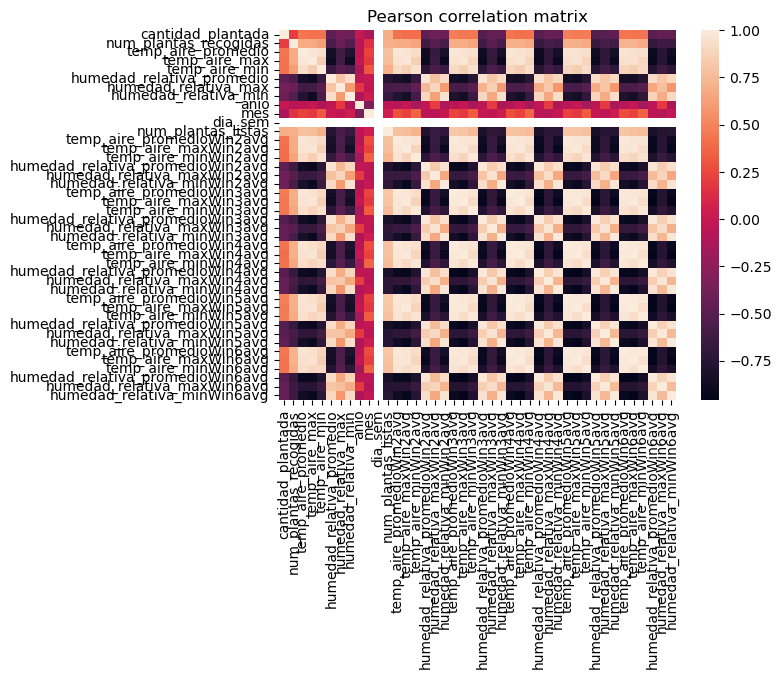

<Figure size 640x480 with 0 Axes>

In [22]:
# Visualize pearson correlation as a heatmap
sns.heatmap(corr_pearson, 
            xticklabels=corr_pearson.columns, 
            yticklabels=corr_pearson.columns)

 # Save / report matrix
img_pearson = 'imgs/pearson.png'
plt.title('Pearson correlation matrix')
plt.savefig(img_pearson, transparent=False, facecolor='white', bbox_inches="tight") 
plt.show()
plt.clf()
pdf.image(img_pearson, x = 10, y = None, w = 140, h = 0, type = 'PNG')

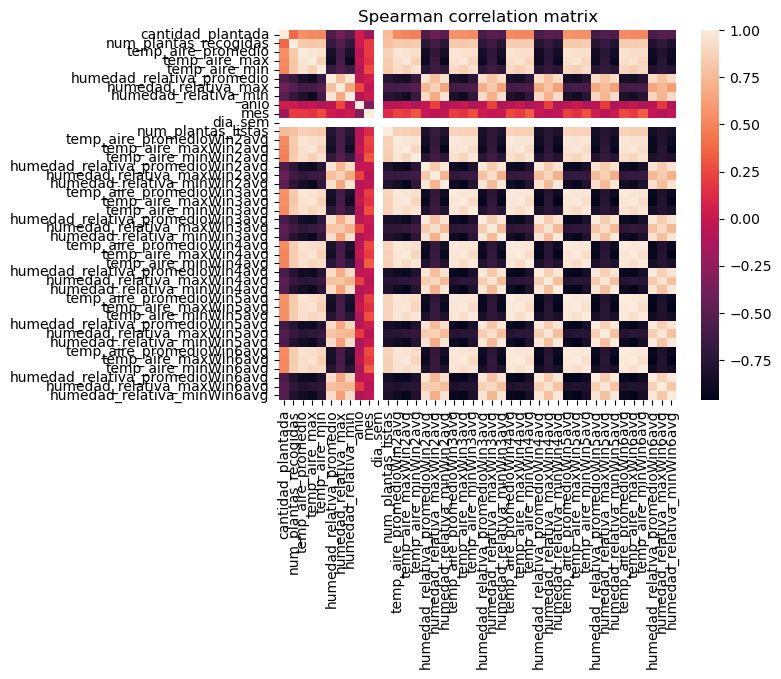

<Figure size 640x480 with 0 Axes>

In [23]:
# Visualize spearman correlation as a heatmap
sns.heatmap(corr_spearman, 
            xticklabels=corr_pearson.columns, 
            yticklabels=corr_pearson.columns)

 # Save / report matrix
img_spearman = 'imgs/spearman.png'
plt.title('Spearman correlation matrix')
plt.savefig(img_spearman, transparent=False, facecolor='white', bbox_inches="tight") 
plt.show()
plt.clf()
pdf.image(img_spearman, x = 10, y = None, w = 140, h = 0, type = 'PNG')

### Save output to PDF file

In [24]:
pdf.output(f'./EDA_report.pdf', 'F')

''